<a href="https://colab.research.google.com/github/merseldali/Projet3_IA/blob/main/Projet3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests, zipfile
from io import BytesIO

import missingno as msno

import io

from sklearn.impute import SimpleImputer
from sklearn import linear_model
from sklearn import decomposition, preprocessing


import plotly.express as px

import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Chargement du fichier

In [2]:
url = 'https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-scientist/P2/fr.openfoodfacts.org.products.csv.zip'

req = requests.get(url)

zf= zipfile.ZipFile(BytesIO(req.content))

In [ ]:
data = pd.read_csv(zf.open('fr.openfoodfacts.org.products.csv'), sep='\t')
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


code                                                url  \
0   3087  http://world-fr.openfoodfacts.org/produit/0000...   
1   4530  http://world-fr.openfoodfacts.org/produit/0000...   
2   4559  http://world-fr.openfoodfacts.org/produit/0000...   
3  16087  http://world-fr.openfoodfacts.org/produit/0000...   
4  16094  http://world-fr.openfoodfacts.org/produit/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (Whole)   
2      1489069957   2017-03-09T14:32:37Z                         Peanuts   
3      1489055731   2017-03-09T10:35:31Z          Organic Salted Nut Mix   
4      1489055653   2017-03-09T10:34:13Z                 Organic Polenta   

  generic_name quantity  ... ph_100g fruits-vegetables-nuts_100g  \
0          NaN      1kg  ...     NaN                         NaN   
1          NaN      NaN  ...     NaN                         NaN   
2          NaN      NaN  ...     NaN                         NaN   
3          NaN      NaN  ...     NaN                         NaN   
4          NaN      NaN  ...     NaN                         NaN   

  collagen-meat-protein-ratio_100g cocoa_100g chlorophyl_100g  \
0                              NaN        NaN             NaN   
1                              NaN        NaN             NaN   
2                              NaN        NaN             NaN   
3                              NaN        NaN             NaN   
4                              NaN        NaN             NaN   

  carbon-footprint_100g nutrition-score-fr_100g nutrition-score-uk_100g  \
0                   NaN                     NaN                     NaN   
1                   NaN                    14.0                    14.0   
2                   NaN                     0.0                     0.0   
3                   NaN                    12.0                    12.0   
4                   NaN                     NaN                     NaN   

  glycemic-index_100g water-hardness_100g  
0                 NaN                 NaN  
1                 NaN                 NaN  
2                 NaN                 NaN  
3                 NaN                 NaN  
4                 NaN                 NaN  

[5 rows x 162 columns]

In [ ]:
data.tail()

code                                                url  \
320767  9948282780603  http://world-fr.openfoodfacts.org/produit/9948...   
320768       99567453  http://world-fr.openfoodfacts.org/produit/9956...   
320769  9970229501521  http://world-fr.openfoodfacts.org/produit/9970...   
320770  9980282863788  http://world-fr.openfoodfacts.org/produit/9980...   
320771   999990026839  http://world-fr.openfoodfacts.org/produit/9999...   

                           creator   created_t      created_datetime  \
320767  openfoodfacts-contributors  1490631299  2017-03-27T16:14:59Z   
320768             usda-ndb-import  1489059076  2017-03-09T11:31:16Z   
320769                      tomato  1422099377  2015-01-24T11:36:17Z   
320770  openfoodfacts-contributors  1492340089  2017-04-16T10:54:49Z   
320771             usda-ndb-import  1489072709  2017-03-09T15:18:29Z   

       last_modified_t last_modified_datetime  \
320767      1491244498   2017-04-03T18:34:58Z   
320768      1491244499   2017-04-03T18:34:59Z   
320769      1491244499   2017-04-03T18:34:59Z   
320770      1492340089   2017-04-16T10:54:49Z   
320771      1491244499   2017-04-03T18:34:59Z   

                                             product_name  \
320767                                  Tomato & ricotta    
320768  Mint Melange Tea A Blend Of Peppermint, Lemon ...   
320769                                            乐吧泡菜味薯片   
320770                           Tomates aux Vermicelles    
320771                    Sugar Free Drink Mix, Peach Tea   

                           generic_name quantity  ... ph_100g  \
320767                              NaN        1  ...     NaN   
320768                              NaN      NaN  ...     NaN   
320769  Leba pickle flavor potato chips     50 g  ...     NaN   
320770                              NaN      67g  ...     NaN   
320771                              NaN      NaN  ...     NaN   

       fruits-vegetables-nuts_100g collagen-meat-protein-ratio_100g  \
320767                         NaN                              NaN   
320768                         NaN                              NaN   
320769                         NaN                              NaN   
320770                         NaN                              NaN   
320771                         NaN                              NaN   

       cocoa_100g chlorophyl_100g carbon-footprint_100g  \
320767        NaN             NaN                   NaN   
320768        NaN             NaN                   NaN   
320769        NaN             NaN                   NaN   
320770        NaN             NaN                   NaN   
320771        NaN             NaN                   NaN   

       nutrition-score-fr_100g nutrition-score-uk_100g glycemic-index_100g  \
320767                     NaN                     NaN                 NaN   
320768                     0.0                     0.0                 NaN   
320769                     NaN                     NaN                 NaN   
320770                     NaN                     NaN                 NaN   
320771                     NaN                     NaN                 NaN   

       water-hardness_100g  
320767                 NaN  
320768                 NaN  
320769                 NaN  
320770                 NaN  
320771                 NaN  

[5 rows x 162 columns]

In [ ]:
data.shape

(320772, 162)

In [ ]:
data['code'].isnull().sum()

23

Cela nous indique qu'il y certainement un problème dans le formatage du fichier

In [ ]:
del data

Nettoyage du fichier

In [3]:
#read input file
fin = zf.open('fr.openfoodfacts.org.products.csv')
#read file contents to string
data_file = fin.read()
#replace all occurrences of the required string
new_content = data_file.replace(b'\r\t', b'\t')
with open(r'/content/cleaned_file.csv', 'wb') as file:
    # Writing the replaced data in our
    # text file
    file.write(new_content)
    file.close()
#close the input file
fin.close()

Chargement du fichier

In [4]:
data = pd.read_csv('/content/cleaned_file.csv', sep='\t', encoding='utf-8')



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,19,20,24,25,26,28,35,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Nettoyage des données

## Valeurs manquantes

In [5]:
data['code'].isnull().sum()

0

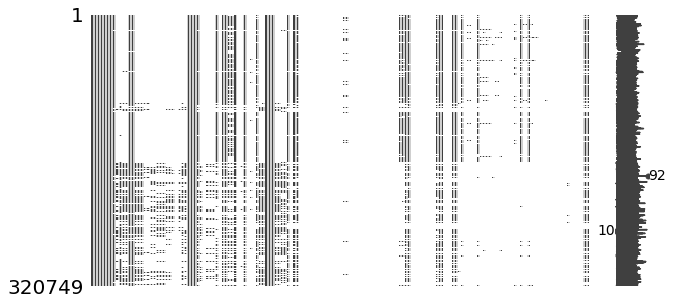

In [6]:
msno.matrix(data, figsize=(10,5))

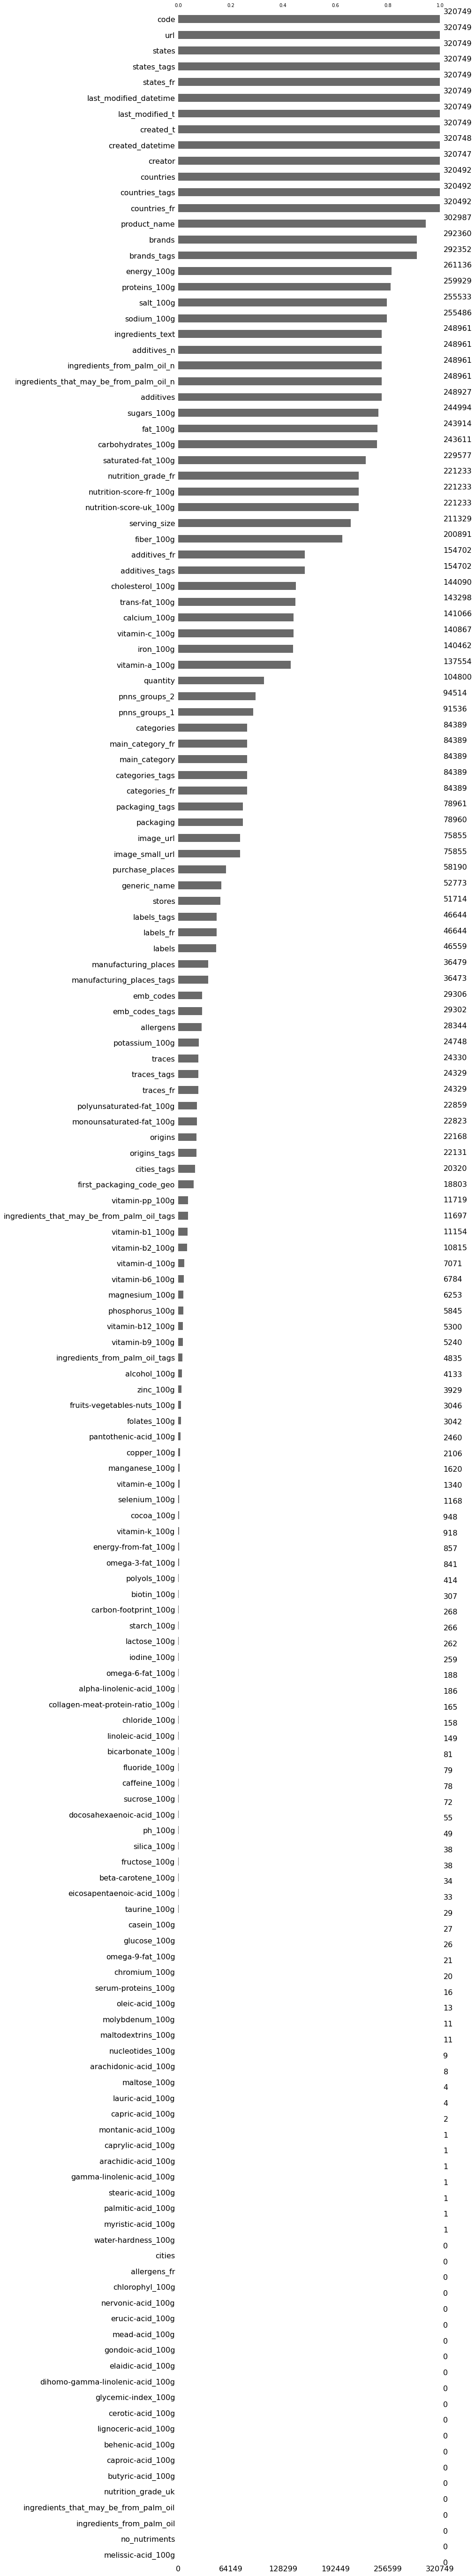

In [7]:
msno.bar(data, figsize=(10,100),  sort='ascending')

## Choix des colonnes

Etant donné que notre analyse se concentre sur le nutriscore et l'écoscore, nous allons garder uniquement les colonnes suivantes :


*   code : code-barre du produit
*   product_name : nom du produit
*   categories : catégories du produit
*   main_category_fr : catégorie principale du produit
*   brands : marque(s) du produit
*   ingredients_from_palm_oil_n : nombre d'ingrédient issus d'huile de palme
*   ingredients_that_may_be_from_palm_oil_n : nombre d'ingrédient susceptibles d'être issus d'huile de palme
*   additives_n : nombre d'additifs
*   nutrition_grade_fr : nutriscore
*   nutrition-score-fr_100g : nutriscore 
*   energy_100g : quantité d'énergie pour 100g de produit
*   proteins_100g : quantité de protéine pour 100g de produit
*   sugars_100g : quantité de sucre pour 100g de produit
*   saturated-fat_100g : quantité de graisse saturée pour 100g de produit
*   fiber_100g : quantité de fibre pour 100g de produit
*   fruits-vegetables-nuts_100g : quantité de fruit, légume, noix pour 100g de produit
*   salt_100g : quantité de sel pour 100g de produit



In [8]:
data['labels_tags'].unique()

array([nan, 'en:organic,en:eu-organic,fr:ab-agriculture-biologique',
       'en:green-dot', ...,
       'en:low-or-no-sugar,en:gluten-free,en:no-added-sugar,fr:oeuf',
       'en:low-or-no-sugar,en:no-sugar,fr:ne-pas-donner-aux-enfants-de-moins-de-5-ans',
       'en:dolphin-friendly,en:fished-by-pole-line,en:recyclable-steel'],
      dtype=object)

In [9]:
data['labels_fr'].unique()

array([nan, 'Bio,Bio européen,AB Agriculture Biologique', 'Point Vert',
       ..., 'Peu ou pas de sucre,Sans gluten,Sans sucre ajouté,Oeuf',
       'Peu ou pas de sucre,Sans sucre,Ne-pas-donner-aux-enfants-de-moins-de-5-ans',
       'en:Dolphin-friendly,en:Fished-by-pole-line,en:Recyclable-steel'],
      dtype=object)

In [10]:
data_cleaned = data.loc[:,['code', 'product_name', 'categories', 'main_category_fr', 'pnns_groups_1', 'pnns_groups_2',
                    'brands', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'additives_n', 'nutrition_grade_fr', 'nutrition-score-fr_100g', 
                    'energy_100g', 'sugars_100g', 'salt_100g', 'saturated-fat_100g', 
                    'proteins_100g', 'fiber_100g', 'fruits-vegetables-nuts_100g']].copy()

In [11]:
data_cleaned.head()

code                    product_name categories main_category_fr  \
0   3087              Farine de blé noir        NaN              NaN   
1   4530  Banana Chips Sweetened (Whole)        NaN              NaN   
2   4559                         Peanuts        NaN              NaN   
3  16087          Organic Salted Nut Mix        NaN              NaN   
4  16094                 Organic Polenta        NaN              NaN   

  pnns_groups_1 pnns_groups_2           brands  ingredients_from_palm_oil_n  \
0           NaN           NaN  Ferme t'y R'nao                          NaN   
1           NaN           NaN              NaN                          0.0   
2           NaN           NaN   Torn & Glasser                          0.0   
3           NaN           NaN        Grizzlies                          0.0   
4           NaN           NaN   Bob's Red Mill                          0.0   

   ingredients_that_may_be_from_palm_oil_n  additives_n nutrition_grade_fr  \
0                                      NaN          NaN                NaN   
1                                      0.0          0.0                  d   
2                                      0.0          0.0                  b   
3                                      0.0          0.0                  d   
4                                      0.0          0.0                NaN   

   nutrition-score-fr_100g  energy_100g  sugars_100g  salt_100g  \
0                      NaN          NaN          NaN        NaN   
1                     14.0       2243.0        14.29    0.00000   
2                      0.0       1941.0        17.86    0.63500   
3                     12.0       2540.0         3.57    1.22428   
4                      NaN       1552.0          NaN        NaN   

   saturated-fat_100g  proteins_100g  fiber_100g  fruits-vegetables-nuts_100g  
0                 NaN            NaN         NaN                          NaN  
1               28.57           3.57         3.6                          NaN  
2                0.00          17.86         7.1                          NaN  
3                5.36          17.86         7.1                          NaN  
4                 NaN           8.57         5.7                          NaN

### Création d'une colonne calculée

Nous allons ajouter une nouvelle feature à notre dataframe : le nombre de vitamines différentes contenues dans le produit (peu importe la proportion).

In [12]:
columns_v = []

for col in data.columns:
  if col[0] == 'v':
    columns_v.append(col)

print(columns_v)


['vitamin-a_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 'vitamin-b12_100g']


Certaines vitamines sont nommées directement par leur nom chimique : ```pantothenic-acid_100g``` pour la vitamine B5 et ```biotin_100g``` pour la vitamine B8

In [13]:
columns_v.append('pantothenic-acid_100g')
columns_v.append('biotin_100g')

On calcule maintenant le compte des vitamines pour chaque ligne.

In [14]:
vit_notna = pd.notna(data[columns_v])

data_cleaned['vitamins_n'] = vit_notna.sum(axis=1)

In [15]:
data_cleaned['vitamins_n'].unique()


array([ 0,  2,  1,  5,  4,  8,  3, 10,  9,  6,  7, 11, 12, 13])

## Analyse rapide des colonnes

In [16]:
data_cleaned.describe(include='all')

code product_name                                  categories  \
count   3.207490e+05       302987                                       84389   
unique  3.206380e+05       221343                                       36976   
top     2.446306e+10    Ice Cream  Snacks sucrés,Biscuits et gâteaux,Biscuits   
freq    2.000000e+00          410                                         301   
mean             NaN          NaN                                         NaN   
std              NaN          NaN                                         NaN   
min              NaN          NaN                                         NaN   
25%              NaN          NaN                                         NaN   
50%              NaN          NaN                                         NaN   
75%              NaN          NaN                                         NaN   
max              NaN          NaN                                         NaN   

       main_category_fr pnns_groups_1 pnns_groups_2     brands  \
count             84389         91536         94514     292360   
unique             3543            14            42      58784   
top            Boissons       unknown       unknown  Carrefour   
freq               6054         22626         22626       2978   
mean                NaN           NaN           NaN        NaN   
std                 NaN           NaN           NaN        NaN   
min                 NaN           NaN           NaN        NaN   
25%                 NaN           NaN           NaN        NaN   
50%                 NaN           NaN           NaN        NaN   
75%                 NaN           NaN           NaN        NaN   
max                 NaN           NaN           NaN        NaN   

        ingredients_from_palm_oil_n  ingredients_that_may_be_from_palm_oil_n  \
count                 248961.000000                            248961.000000   
unique                          NaN                                      NaN   
top                             NaN                                      NaN   
freq                            NaN                                      NaN   
mean                       0.019658                                 0.055246   
std                        0.140518                                 0.269203   
min                        0.000000                                 0.000000   
25%                        0.000000                                 0.000000   
50%                        0.000000                                 0.000000   
75%                        0.000000                                 0.000000   
max                        2.000000                                 6.000000   

          additives_n nutrition_grade_fr  nutrition-score-fr_100g  \
count   248961.000000             221233            221233.000000   
unique            NaN                  5                      NaN   
top               NaN                  d                      NaN   
freq              NaN              62763                      NaN   
mean         1.936384                NaN                 9.164736   
std          2.502319                NaN                 9.055796   
min          0.000000                NaN               -15.000000   
25%          0.000000                NaN                 1.000000   
50%          1.000000                NaN                10.000000   
75%          3.000000                NaN                16.000000   
max         31.000000                NaN                40.000000   

         energy_100g    sugars_100g      salt_100g  saturated-fat_100g  \
count   2.611360e+05  244994.000000  255533.000000       229577.000000   
unique           NaN            NaN            NaN                 NaN   
top              NaN            NaN            NaN                 NaN   
freq             NaN            NaN            NaN                 NaN   
mean    1.141842e+03      16.002983       2.028455            5.129562   
std     6.446875

In [17]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320749 entries, 0 to 320748
Data columns (total 20 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   code                                     320749 non-null  object 
 1   product_name                             302987 non-null  object 
 2   categories                               84389 non-null   object 
 3   main_category_fr                         84389 non-null   object 
 4   pnns_groups_1                            91536 non-null   object 
 5   pnns_groups_2                            94514 non-null   object 
 6   brands                                   292360 non-null  object 
 7   ingredients_from_palm_oil_n              248961 non-null  float64
 8   ingredients_that_may_be_from_palm_oil_n  248961 non-null  float64
 9   additives_n                              248961 non-null  float64
 10  nutrition_grade_fr              

## Nettoyages des données

### Correction des types

In [18]:
data_cleaned.dtypes

code                                        object
product_name                                object
categories                                  object
main_category_fr                            object
pnns_groups_1                               object
pnns_groups_2                               object
brands                                      object
ingredients_from_palm_oil_n                float64
ingredients_that_may_be_from_palm_oil_n    float64
additives_n                                float64
nutrition_grade_fr                          object
nutrition-score-fr_100g                    float64
energy_100g                                float64
sugars_100g                                float64
salt_100g                                  float64
saturated-fat_100g                         float64
proteins_100g                              float64
fiber_100g                                 float64
fruits-vegetables-nuts_100g                float64
vitamins_n                     

In [19]:
data_cleaned['additives_n'].unique()

array([nan,  0.,  2.,  1.,  3.,  6.,  5.,  8.,  4., 10., 11.,  9.,  7.,
       13., 12., 18., 22., 19., 17., 25., 21., 14., 16., 20., 24., 23.,
       15., 26., 28., 27., 29., 31.])

Nous allons supposer que les valeurs nan pour la colonne ``` additives_n ``` sont équivalentes à la valeur 0. En effet, si l'article contenait des adittifs un nombre aurait été spécifié.

In [20]:
data_cleaned['additives_n'] = data_cleaned['additives_n'].fillna(-1).astype('Int64')
data_cleaned['ingredients_from_palm_oil_n'] = data_cleaned['ingredients_from_palm_oil_n'].fillna(-1).astype('Int64')
data_cleaned['ingredients_that_may_be_from_palm_oil_n'] = data_cleaned['ingredients_that_may_be_from_palm_oil_n'].fillna(-1).astype('Int64')


data_cleaned['additives_n'] = data_cleaned['additives_n'].replace(-1, np.nan)
data_cleaned['ingredients_from_palm_oil_n'] = data_cleaned['ingredients_from_palm_oil_n'].replace(-1, np.nan)
data_cleaned['ingredients_that_may_be_from_palm_oil_n'] = data_cleaned['ingredients_that_may_be_from_palm_oil_n'].replace(-1, np.nan)

### Données manquantes

In [21]:
nb_na = data_cleaned.isnull().sum()
nb_na[nb_na>0]

product_name                                17762
categories                                 236360
main_category_fr                           236360
pnns_groups_1                              229213
pnns_groups_2                              226235
brands                                      28389
ingredients_from_palm_oil_n                 71788
ingredients_that_may_be_from_palm_oil_n     71788
additives_n                                 71788
nutrition_grade_fr                          99516
nutrition-score-fr_100g                     99516
energy_100g                                 59613
sugars_100g                                 75755
salt_100g                                   65216
saturated-fat_100g                          91172
proteins_100g                               60820
fiber_100g                                 119858
fruits-vegetables-nuts_100g                317703
dtype: int64

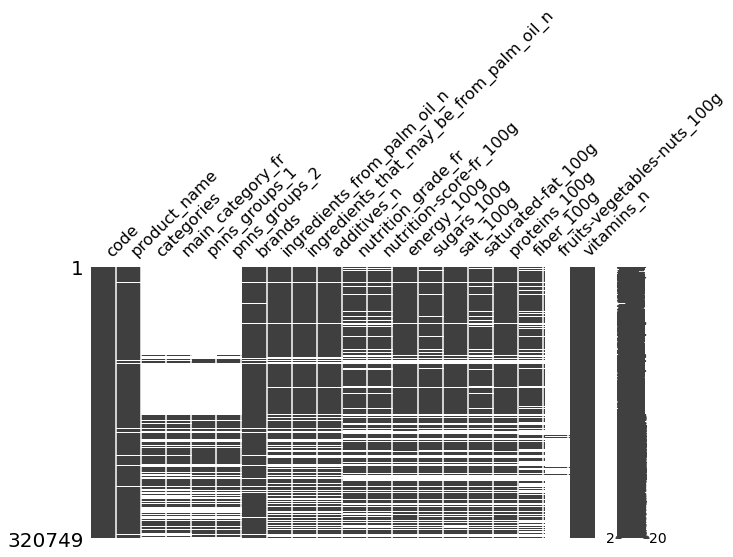

In [22]:
msno.matrix(data_cleaned, figsize=(10,5))

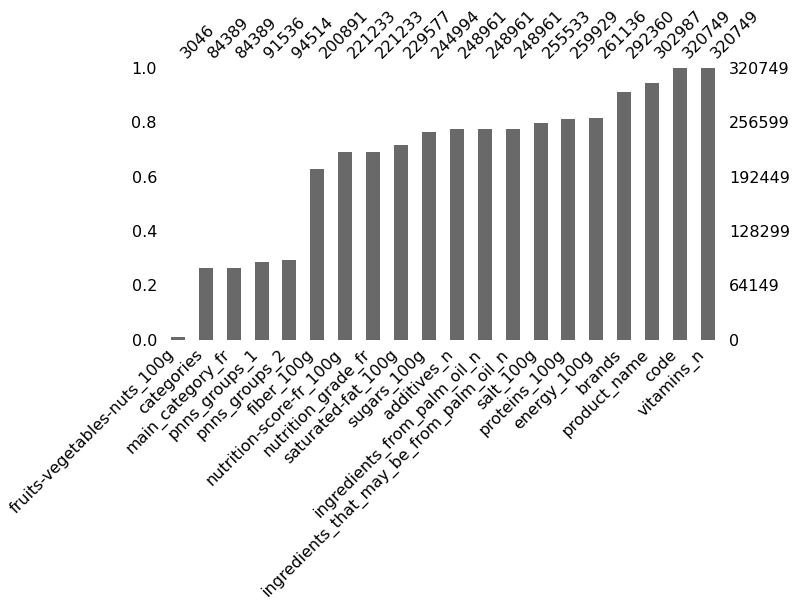

In [23]:
msno.bar(data_cleaned, figsize=(10,5),  sort='ascending')

On voit que : 


*   la colonne ``` fruits-vegetables-nuts_100g ``` n'est presque jamais renseignée.
*   les colonnes ``` categories ``` et ``` main_category ``` sont très peu renseignées avec moins de 30 % de valeurs indiquées.
*   les colonnes ``` *_100g ``` et la colonne ``` nutrition_grade_fr ``` sont peu renseignées avec entre 60 et 80 % de valeurs indiquées.
*   les colonnes ``` brands ``` et ``` product_name ``` sont assez bien renseignée avec plus de 90 % de valeurs indiquées



In [24]:
data_cleaned['main_category_fr'].unique()

array([nan, 'Filet-de-boeuf', 'Légumes frais', ..., 'Sauce-a-l-ail',
       'Attieke', 'pl:Szprot'], dtype=object)

In [25]:
data_cleaned['categories'].unique()

array([nan, 'Filet de bœuf', 'Légumes-feuilles', ...,
       'Boissons,Boissons alcoolisées,Vins,Vins blancs,Roussette du Bugey',
       'pl:Szprot',
       "Viandes,Produits à tartiner,Charcuteries,Produits à tartiner salés,Rillettes,Rillettes de viande,Rillettes de viande blanche,Rillettes de volaille,Rillettes d'oie"],
      dtype=object)

In [26]:
data_cleaned.loc[~data_cleaned['categories'].isnull(),:]

code                    product_name  \
46              24600                   Filet de bœuf   
174            290616                    Salade Cesar   
175            394710  Danoises à la cannelle roulées   
177           1071894                           Flute   
180           1938067    Chaussons tressés aux pommes   
...               ...                             ...   
320739  9908278636246        Szprot w oleju roslinnym   
320740       99111250              Thé vert Earl grey   
320742  9935010000003                  Rillette d'oie   
320743       99410148                             NaN   
320746  9970229501521                         乐吧泡菜味薯片   

                                               categories  \
46                                          Filet de bœuf   
174                                      Légumes-feuilles   
175         Snacks sucrés,Biscuits et gâteaux,Pâtisseries   
177     Plant-based foods and beverages,Plant-based fo...   
180         Snacks sucrés,Biscuits et gâteaux,Pâtisseries   
...                                                   ...   
320739                                          pl:Szprot   
320740                                         thés verts   
320742  Viandes,Produits à tartiner,Charcuteries,Produ...   
320743                                            Peanuts   
320746                                       Potato chips   

                 main_category_fr          pnns_groups_1  \
46                 Filet-de-boeuf                unknown   
174                 Légumes frais  Fruits and vegetables   
175                   Pâtisseries          Sugary snacks   
177                         Pains   Cereals and potatoes   
180                   Pâtisseries          Sugary snacks   
...                           ...                    ...   
320739                  pl:Szprot                unknown   
320740                 Thés verts              Beverages   
320742  Produits à tartiner salés         Fish Meat Eggs   
320743            Fruits à coques           Salty snacks   
320746            Chips et frites           Salty snacks   

                pnns_groups_2                 brands  \
46                    unknown                    NaN   
174                Vegetables     Kirkland Signature   
175        Biscuits and cakes     Kirkland Signature   
177                     Bread               Waitrose   
180        Biscuits and cakes     Kirkland Signature   
...                       ...                    ...   
320739                unknown               EvraFish   
320740  Non-sugared beverages                Lobodis   
320742         Processed meat  Sans marque,D.Lambert   
320743                   Nuts                    NaN   
320746             Appetizers                     乐吧   

        ingredients_from_palm_oil_n  ingredients_that_may_be_from_palm_oil_n  \
46                             <NA>                                     <NA>   
174                               0                                        0   
175                               0                                        1   
177                               0                                        0   
180                               0                                        0   
...                             ...                                      ...   
320739                         <NA>                                     <NA>   
320740                            0                                        0   
320742                            0                                        0   
320743                         <NA>                                     <NA>   
320746                         <NA>                                     <NA>   

        additives_n nutrition_grade_fr  nutrition-score-fr_100g  energy_100g  \
46             <NA>                NaN                      NaN          NaN   
174               0                  c                      6.0       1210.0   
175 

### Nettoyage des colonnes texte

#### Trim

In [27]:
df_obj = data_cleaned.select_dtypes(['object'])
data_cleaned[df_obj.columns] = df_obj.astype(str).apply(lambda x: x.str.strip())

In [28]:
for col in df_obj.columns:
    data_cleaned[col] = data_cleaned[col].replace('nan', np.nan)   

#### pnns

In [29]:
data_cleaned['pnns_groups_1'].unique()

array([nan, 'unknown', 'Fruits and vegetables', 'Sugary snacks',
       'Cereals and potatoes', 'Composite foods', 'Fish Meat Eggs',
       'Beverages', 'Fat and sauces', 'fruits-and-vegetables',
       'Milk and dairy products', 'Salty snacks', 'sugary-snacks',
       'cereals-and-potatoes', 'salty-snacks'], dtype=object)

In [30]:
data_cleaned['pnns_groups_1'].unique().size

15

In [31]:
data_cleaned['pnns_groups_2'].unique()

array([nan, 'unknown', 'Vegetables', 'Biscuits and cakes', 'Bread',
       'Legumes', 'Pizza pies and quiche', 'Meat', 'Sweets',
       'Non-sugared beverages', 'Sweetened beverages',
       'Dressings and sauces', 'One-dish meals', 'vegetables', 'Soups',
       'Chocolate products', 'Alcoholic beverages', 'Fruits', 'Sandwich',
       'Cereals', 'Milk and yogurt', 'Fats', 'Cheese', 'Appetizers',
       'Nuts', 'Breakfast cereals', 'Artificially sweetened beverages',
       'Fruit juices', 'Eggs', 'Fish and seafood', 'Dried fruits',
       'Ice cream', 'Processed meat', 'Potatoes', 'Dairy desserts',
       'Fruit nectars', 'pastries', 'Tripe dishes', 'fruits',
       'Salty and fatty products', 'cereals', 'legumes', 'nuts'],
      dtype=object)

In [32]:
data_cleaned['pnns_groups_2'].unique().size

43

On remplace les valeur 'unknown' par nan.

On voit qu'il ya des doublons lexicaux dans les 2 colonnes, les différences se situent dans le formattage avec par exemple Salty snacks et salty-snacks.

In [33]:
def cleanPnns(data):
  #pnns1
  data['pnns_groups_1'] = data['pnns_groups_1'].replace('unknown', np.nan)  
  data['pnns_groups_1'] = data['pnns_groups_1'].str.replace('-', ' ')
  data['pnns_groups_1'] = data['pnns_groups_1'].str.capitalize()
  data['pnns_groups_1'] = data['pnns_groups_1'].replace('nan', np.nan) 

  #pnns2
  data['pnns_groups_2'] = data['pnns_groups_2'].replace('unknown', np.nan)
  data['pnns_groups_2'] = data['pnns_groups_2'].str.replace('-', ' ')
  data['pnns_groups_2'] = data['pnns_groups_2'].str.capitalize()
  data['pnns_groups_2'] = data['pnns_groups_2'].replace('nan', np.nan) 

  return data

In [34]:
data_cleaned = cleanPnns(data_cleaned)

In [35]:
data_cleaned['pnns_groups_1'].unique().size

10

In [36]:
data_cleaned['pnns_groups_2'].unique().size

37

#### main_category_fr

In [37]:
data_cleaned['main_category_fr'].unique()

array([nan, 'Filet-de-boeuf', 'Légumes frais', ..., 'Sauce-a-l-ail',
       'Attieke', 'pl:Szprot'], dtype=object)

In [38]:
data_cleaned['main_category_fr'].unique().size

3544

In [39]:
def cleanMainCategoryFr(data):
  data['main_category_fr'] = data['main_category_fr'].replace('unknown', np.nan)  
  data['main_category_fr'] = data['main_category_fr'].str.replace('-', ' ')
  data['main_category_fr'] = data['main_category_fr'].str.lower()
  data['main_category_fr'] = data['main_category_fr'].str.capitalize()
  data['main_category_fr'] = data['main_category_fr'].replace('nan', np.nan) 
  return data

In [40]:
data_cleaned = cleanMainCategoryFr(data_cleaned)

In [41]:
data_cleaned['main_category_fr'].unique().size

3544

### Nettoyage des valeurs quantitatives

#### Valeurs négatives

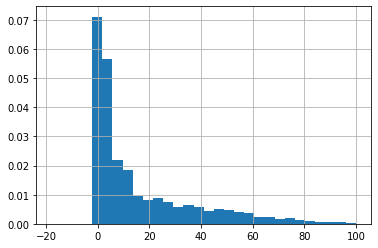

In [42]:
# Histogramme
data_cleaned[data_cleaned.sugars_100g.abs() < 100]["sugars_100g"].hist(density=True,bins=30)
plt.show()

In [43]:
def RemoveRowsWithNegatives(data):
  for col in data.columns:
    if col.endswith('_100g') & (col != 'nutrition-score-fr_100g'):
      data = data[(data[col] < 0) == False]
  return data

def NanRowsWithNegatives(data):
  for col in data.columns:
    if col.endswith('_100g') & (col != 'nutrition-score-fr_100g'):
      data.loc[data[col] < 0, col] = np.nan
  return data

In [44]:
data_cleaned.isnull().sum()

code                                            0
product_name                                17762
categories                                 236360
main_category_fr                           236360
pnns_groups_1                              251839
pnns_groups_2                              248861
brands                                      28389
ingredients_from_palm_oil_n                 71788
ingredients_that_may_be_from_palm_oil_n     71788
additives_n                                 71788
nutrition_grade_fr                          99516
nutrition-score-fr_100g                     99516
energy_100g                                 59613
sugars_100g                                 75755
salt_100g                                   65216
saturated-fat_100g                          91172
proteins_100g                               60820
fiber_100g                                 119858
fruits-vegetables-nuts_100g                317703
vitamins_n                                      0


In [45]:
data_cleaned = NanRowsWithNegatives(data_cleaned)

In [46]:
data_cleaned.isnull().sum()

code                                            0
product_name                                17762
categories                                 236360
main_category_fr                           236360
pnns_groups_1                              251839
pnns_groups_2                              248861
brands                                      28389
ingredients_from_palm_oil_n                 71788
ingredients_that_may_be_from_palm_oil_n     71788
additives_n                                 71788
nutrition_grade_fr                          99516
nutrition-score-fr_100g                     99516
energy_100g                                 59613
sugars_100g                                 75762
salt_100g                                   65216
saturated-fat_100g                          91172
proteins_100g                               60823
fiber_100g                                 119859
fruits-vegetables-nuts_100g                317703
vitamins_n                                      0


In [47]:
data_cleaned.describe(include='all')

code product_name                                  categories  \
count        320749       302987                                       84389   
unique       320579       219848                                       36975   
top     70650800367    Ice Cream  Snacks sucrés,Biscuits et gâteaux,Biscuits   
freq              3          410                                         301   
mean            NaN          NaN                                         NaN   
std             NaN          NaN                                         NaN   
min             NaN          NaN                                         NaN   
25%             NaN          NaN                                         NaN   
50%             NaN          NaN                                         NaN   
75%             NaN          NaN                                         NaN   
max             NaN          NaN                                         NaN   

       main_category_fr  pnns_groups_1   pnns_groups_2     brands  \
count             84389          68910           71888     292360   
unique             3543              9              36      58052   
top            Boissons  Sugary snacks  One dish meals  Carrefour   
freq               6054          12864            5546       3035   
mean                NaN            NaN             NaN        NaN   
std                 NaN            NaN             NaN        NaN   
min                 NaN            NaN             NaN        NaN   
25%                 NaN            NaN             NaN        NaN   
50%                 NaN            NaN             NaN        NaN   
75%                 NaN            NaN             NaN        NaN   
max                 NaN            NaN             NaN        NaN   

        ingredients_from_palm_oil_n  ingredients_that_may_be_from_palm_oil_n  \
count                 248961.000000                            248961.000000   
unique                          NaN                                      NaN   
top                             NaN                                      NaN   
freq                            NaN                                      NaN   
mean                       0.019658                                 0.055246   
std                        0.140518                                 0.269203   
min                        0.000000                                 0.000000   
25%                        0.000000                                 0.000000   
50%                        0.000000                                 0.000000   
75%                        0.000000                                 0.000000   
max                        2.000000                                 6.000000   

          additives_n nutrition_grade_fr  nutrition-score-fr_100g  \
count   248961.000000             221233            221233.000000   
unique            NaN                  5                      NaN   
top               NaN                  d                      NaN   
freq              NaN              62763                      NaN   
mean         1.936384                NaN                 9.164736   
std          2.502319                NaN                 9.055796   
min          0.000000                NaN               -15.000000   
25%          0.000000                NaN                 1.000000   
50%          1.000000                NaN                10.000000   
75%          3.000000                NaN                16.000000   
max         31.000000                NaN                40.000000   

         energy_100g    sugars_100g      salt_100g  saturated-fat_100g  \
count   2.611360e+05  244987.000000  255533.000000       229577.000000   
unique           NaN            NaN            NaN                 NaN   
top              NaN            NaN            NaN                 NaN   
freq             NaN            NaN            NaN                 NaN   
mean    1.141842e+03      16.003589       2.028455            5.1

#### Valeurs > 100g

In [48]:
def RemoveRows100g(data):
  for col in data.columns:
    if col.endswith('_100g') & (col not in ['nutrition-score-fr_100g', 'energy_100g']):
      data = data[(data[col] > 100) == False]
  return data

def NanRows100g(data):
  for col in data.columns:
    if col.endswith('_100g') & (col not in ['nutrition-score-fr_100g', 'energy_100g']):
      data.loc[data[col] > 100, col] = np.nan
  return data

In [49]:
data_cleaned.isnull().sum()

code                                            0
product_name                                17762
categories                                 236360
main_category_fr                           236360
pnns_groups_1                              251839
pnns_groups_2                              248861
brands                                      28389
ingredients_from_palm_oil_n                 71788
ingredients_that_may_be_from_palm_oil_n     71788
additives_n                                 71788
nutrition_grade_fr                          99516
nutrition-score-fr_100g                     99516
energy_100g                                 59613
sugars_100g                                 75762
salt_100g                                   65216
saturated-fat_100g                          91172
proteins_100g                               60823
fiber_100g                                 119859
fruits-vegetables-nuts_100g                317703
vitamins_n                                      0


In [50]:
data_cleaned = NanRows100g(data_cleaned)

In [51]:
data_cleaned.isnull().sum()

code                                            0
product_name                                17762
categories                                 236360
main_category_fr                           236360
pnns_groups_1                              251839
pnns_groups_2                              248861
brands                                      28389
ingredients_from_palm_oil_n                 71788
ingredients_that_may_be_from_palm_oil_n     71788
additives_n                                 71788
nutrition_grade_fr                          99516
nutrition-score-fr_100g                     99516
energy_100g                                 59613
sugars_100g                                 75774
salt_100g                                   65374
saturated-fat_100g                          91175
proteins_100g                               60824
fiber_100g                                 119863
fruits-vegetables-nuts_100g                317703
vitamins_n                                      0


### Doublons

#### Code

In [52]:
data_cleaned[data_cleaned.duplicated(['code'], keep=False)]


code                   product_name  \
6            16117  Organic Long Grain White Rice   
46           24600                  Filet de bœuf   
62           31233     35% Fruit And Fiber Muesli   
155          58001      Organic Salted Pistachios   
194       20004552          Côte du Rhône village   
...            ...                            ...   
320721  9800120499                 Ferrero Rocher   
320722  9800801107                            NaN   
320723  9800895007                            NaN   
320724  9800895250                            NaN   
320732      988639                            NaN   

                                           categories  main_category_fr  \
6                                                 NaN               NaN   
46                                      Filet de bœuf    Filet de boeuf   
62                                                NaN               NaN   
155                                               NaN               NaN   
194                                               NaN               NaN   
...                                               ...               ...   
320721                                            NaN               NaN   
320722  fr:Pâtes à tartiner aux noisettes et au cacao  Pâtes à tartiner   
320723  fr:Pâtes à tartiner aux noisettes et au cacao  Pâtes à tartiner   
320724  fr:Pâtes à tartiner aux noisettes et au cacao  Pâtes à tartiner   
320732  fr:Pâtes à tartiner aux noisettes et au cacao  Pâtes à tartiner   

        pnns_groups_1 pnns_groups_2         brands  \
6                 NaN           NaN       Lundberg   
46                NaN           NaN            NaN   
62                NaN           NaN  Golden Temple   
155               NaN           NaN           Unfi   
194               NaN           NaN            NaN   
...               ...           ...            ...   
320721            NaN           NaN            NaN   
320722  Sugary snacks        Sweets            NaN   
320723  Sugary snacks        Sweets            NaN   
320724  Sugary snacks        Sweets            NaN   
320732  Sugary snacks        Sweets            NaN   

        ingredients_from_palm_oil_n  ingredients_that_may_be_from_palm_oil_n  \
6                                 0                                        0   
46                             <NA>                                     <NA>   
62                                0                                        0   
155                               0                                        0   
194                            <NA>                                     <NA>   
...                             ...                                      ...   
320721                         <NA>                                     <NA>   
320722                         <NA>                                     <NA>   
320723                         <NA>                                     <NA>   
320724                         <NA>                                     <NA>   
320732                         <NA>                                     <NA>   

        additives_n nutrition_grade_fr  nutrition-score-fr_100g  energy_100g  \
6                 0                NaN                      NaN       1490.0   
46             <NA>                NaN                      NaN          NaN   
62                3                NaN                      NaN       1523.0   
155               0                  d                     15.0       2540.0   
194            <NA>                NaN                      NaN          NaN   
...             ...                ...                      ...          ...   
320721         <NA>                NaN                      NaN          NaN   
320722         <NA>                NaN                      NaN          NaN   
320723         <NA>                NaN                      NaN          NaN   
320724         <NA>                NaN                      NaN   

In [53]:
data_cleaned.loc[data_cleaned['code'] == '16117']

code                           product_name categories main_category_fr  \
6    16117          Organic Long Grain White Rice        NaN              NaN   
481  16117  Colossal Olives With Jalapeno Peppers        NaN              NaN   

    pnns_groups_1 pnns_groups_2        brands  ingredients_from_palm_oil_n  \
6             NaN           NaN      Lundberg                            0   
481           NaN           NaN  Trader Joe's                            0   

     ingredients_that_may_be_from_palm_oil_n  additives_n nutrition_grade_fr  \
6                                          0            0                NaN   
481                                        0            1                NaN   

     nutrition-score-fr_100g  energy_100g  sugars_100g  salt_100g  \
6                        NaN       1490.0          NaN        NaN   
481                      NaN        347.0          NaN    3.38582   

     saturated-fat_100g  proteins_100g  fiber_100g  \
6                   NaN           8.89         NaN   
481                 NaN           0.00         NaN   

     fruits-vegetables-nuts_100g  vitamins_n  
6                            NaN           1  
481                          NaN           1

In [54]:
data.iloc[6].url

'http://world-fr.openfoodfacts.org/produit/0000000016117/organic-long-grain-white-rice-lundberg'

In [55]:
data.iloc[481].url

'http://world-fr.openfoodfacts.org/produit/00016117/colossal-olives-with-jalapeno-peppers-trader-joe-s'

On voit qu'il y'a une erreur de saisie sur les données, cependant il nous est impossible de corriger le code. Il ne s'agit pas réellement de doublons en tant que tel mais des produits ayant été inscrit avec le même code par erreur.

Nous décidons donc d'ignorer ces "doublons"

### Outliers

#### Fonctions Outliers

In [56]:
def get_outliers(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] <= fence_low) | (df_in[col_name] >= fence_high)]
    print('Colonne : ', col_name, ' => écart interquartile : ', iqr, ' / limite inférieure : ', fence_low, ' / limite supérieure : ', fence_high, ' => ', df_out.shape[0], ' outliers.')
    return df_out

def remove_outliers(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

def nan_outliers(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    print('Colonne : ', col_name, ' => écart interquartile : ', iqr, ' / limite inférieure : ', fence_low, ' / limite supérieure : ', fence_high, ' => ', df_in.loc[(df_in[col_name] <= fence_low) | (df_in[col_name] >= fence_high), col_name].shape[0], ' outliers.')
    df_in.loc[(df_in[col_name] <= fence_low) | (df_in[col_name] >= fence_high), col_name] = np.nan
    df_out = df_in
    return df_out

In [57]:
def plot_boxplots(dataframe, categorical_column, numerical_columns, order_values, num_cols: int = 3) -> None:
    """ Draw one boxplot per numerical variable, split per categories.

        Arguments :
        - dataframe : Pandas DataFrame containing the data, including the categorical_column and numerical_columns
        - categorical_column : string representing the name of the variable containing the categories
        - numerical_columns : list of strings representing the name of the numerical variables to plot
        - order_values : list of strings representing the values of the numerical variables to plot

        Returns : None
    """
    num_lines = int(np.ceil(len(numerical_columns) / num_cols))
    fig, axes = plt.subplots(num_lines, num_cols, figsize=(8 * num_cols , 8 * num_lines))
    fig.suptitle(f'Distributions des variables numériques en fonction de { categorical_column }', fontsize=24)

    for i, col in enumerate(numerical_columns):
        sns.boxplot(data=dataframe,
            x=categorical_column, 
            y=col,
            order=order_values,
            showmeans=True,
            ax=axes[int(np.floor(i / num_cols)), i % num_cols],
        )

#### Valeurs

Colonne :  ingredients_from_palm_oil_n  => écart interquartile :  0  / limite inférieure :  0.0  / limite supérieure :  0.0  =>  248961  outliers.


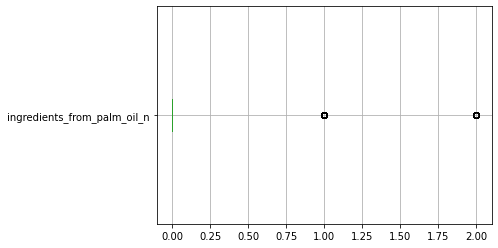

Colonne :  ingredients_that_may_be_from_palm_oil_n  => écart interquartile :  0  / limite inférieure :  0.0  / limite supérieure :  0.0  =>  248961  outliers.


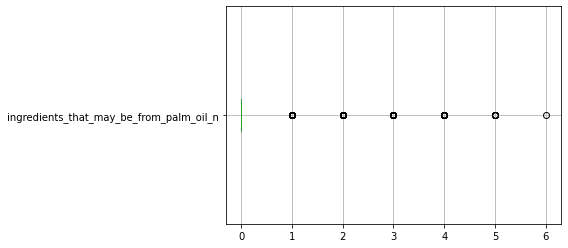

Colonne :  additives_n  => écart interquartile :  3  / limite inférieure :  -4.5  / limite supérieure :  7.5  =>  9807  outliers.


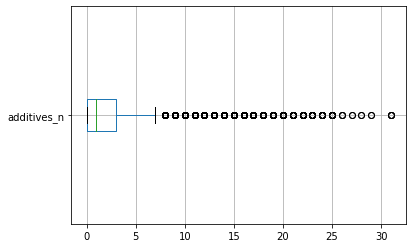

Colonne :  nutrition-score-fr_100g  => écart interquartile :  15.0  / limite inférieure :  -21.5  / limite supérieure :  38.5  =>  4  outliers.


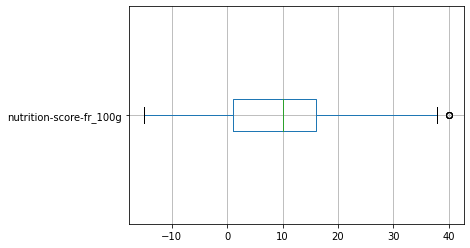

Colonne :  energy_100g  => écart interquartile :  1297.0  / limite inférieure :  -1568.5  / limite supérieure :  3619.5  =>  1080  outliers.


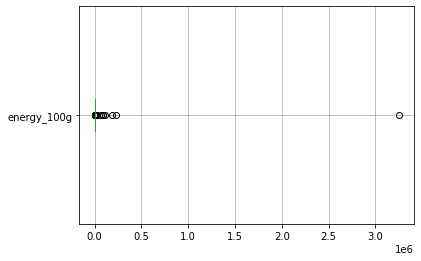

Colonne :  sugars_100g  => écart interquartile :  22.7  / limite inférieure :  -32.75  / limite supérieure :  58.05  =>  15296  outliers.


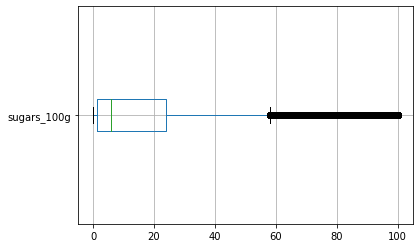

Colonne :  salt_100g  => écart interquartile :  1.3081  / limite inférieure :  -1.89865  / limite supérieure :  3.33375  =>  16333  outliers.


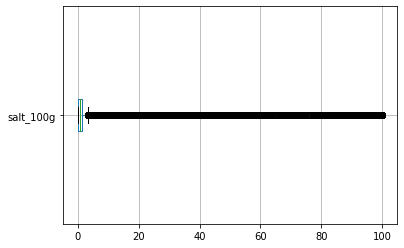

Colonne :  saturated-fat_100g  => écart interquartile :  7.14  / limite inférieure :  -10.709999999999999  / limite supérieure :  17.849999999999998  =>  17244  outliers.


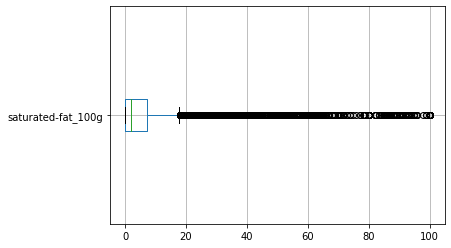

Colonne :  proteins_100g  => écart interquartile :  9.3  / limite inférieure :  -13.250000000000002  / limite supérieure :  23.950000000000003  =>  12589  outliers.


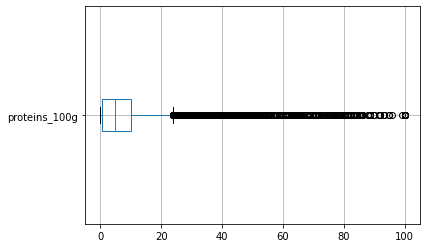

Colonne :  fiber_100g  => écart interquartile :  3.6  / limite inférieure :  -5.4  / limite supérieure :  9.0  =>  14390  outliers.


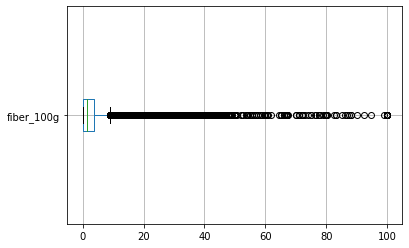

Colonne :  fruits-vegetables-nuts_100g  => écart interquartile :  50.95  / limite inférieure :  -76.42500000000001  / limite supérieure :  127.37500000000001  =>  0  outliers.


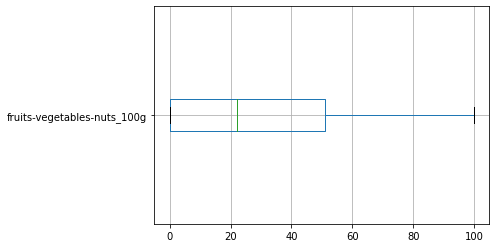

Colonne :  vitamins_n  => écart interquartile :  2.0  / limite inférieure :  -3.0  / limite supérieure :  5.0  =>  10735  outliers.


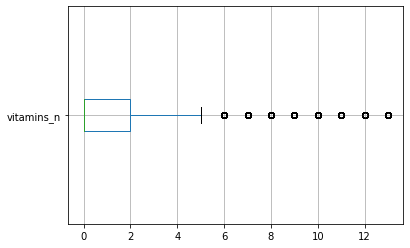

In [58]:
for col in data_cleaned.columns:
    if (col.endswith('_100g') or col.endswith('_n')):
      get_outliers(data_cleaned, col)
      data_cleaned.boxplot(column=col, vert=False)
      plt.show()

Nous allons passer à NaN les valeurs aberrantes pour les colonnes en _100g uniquement car après vérification : 


*   la colonne ```additives_n``` possède des valeurs aberrantes mais sémantiquement plausibles. Elles sont donc atypiques.
*   Le même constat est fait pour les colonnes en ```*_n```



In [59]:
for col in data_cleaned.columns:
    if (col.endswith('_100g')):
      data_cleaned = nan_outliers(data_cleaned, col)

Colonne :  nutrition-score-fr_100g  => écart interquartile :  15.0  / limite inférieure :  -21.5  / limite supérieure :  38.5  =>  4  outliers.
Colonne :  energy_100g  => écart interquartile :  1297.0  / limite inférieure :  -1568.5  / limite supérieure :  3619.5  =>  1080  outliers.
Colonne :  sugars_100g  => écart interquartile :  22.7  / limite inférieure :  -32.75  / limite supérieure :  58.05  =>  15296  outliers.
Colonne :  salt_100g  => écart interquartile :  1.3081  / limite inférieure :  -1.89865  / limite supérieure :  3.33375  =>  16333  outliers.
Colonne :  saturated-fat_100g  => écart interquartile :  7.14  / limite inférieure :  -10.709999999999999  / limite supérieure :  17.849999999999998  =>  17244  outliers.
Colonne :  proteins_100g  => écart interquartile :  9.3  / limite inférieure :  -13.250000000000002  / limite supérieure :  23.950000000000003  =>  12589  outliers.
Colonne :  fiber_100g  => écart interquartile :  3.6  / limite inférieure :  -5.4  / limite supérie

In [60]:
data_cleaned.describe()

ingredients_from_palm_oil_n  ingredients_that_may_be_from_palm_oil_n  \
count                248961.000000                            248961.000000   
mean                      0.019658                                 0.055246   
std                       0.140518                                 0.269203   
min                       0.000000                                 0.000000   
25%                       0.000000                                 0.000000   
50%                       0.000000                                 0.000000   
75%                       0.000000                                 0.000000   
max                       2.000000                                 6.000000   

         additives_n  nutrition-score-fr_100g    energy_100g    sugars_100g  \
count  248961.000000            221229.000000  260056.000000  229679.000000   
mean        1.936384                 9.164178    1114.283467      12.130071   
std         2.502319                 9.054928     781.784025      15.161208   
min         0.000000               -15.000000       0.000000       0.000000   
25%         0.000000                 1.000000     372.000000       1.080000   
50%         1.000000                10.000000    1094.000000       4.800000   
75%         3.000000                16.000000    1674.000000      18.400000   
max        31.000000                38.000000    3619.000000      58.000000   

           salt_100g  saturated-fat_100g  proteins_100g     fiber_100g  \
count  239042.000000       212330.000000  247336.000000  186496.000000   
mean        0.718191            3.502375       5.887857       1.904580   
std         0.774139            4.548240       5.998511       2.199023   
min         0.000000            0.000000       0.000000       0.000000   
25%         0.048260            0.000000       0.500000       0.000000   
50%         0.474980            1.400000       4.230000       1.200000   
75%         1.186180            5.700000       9.000000       3.200000   
max         3.332480           17.840000      23.940000       8.930000   

       fruits-vegetables-nuts_100g     vitamins_n  
count                  3046.000000  320749.000000  
mean                     31.376615       1.064786  
std                      31.947699       1.450517  
min                       0.000000       0.000000  
25%                       0.000000       0.000000  
50%                      22.100000       0.000000  
75%                      50.950000       2.000000  
max                     100.000000      13.000000

#### Outliers suivant une variable catégorielle

In [61]:
data_cleaned['nutrition_grade_fr'].unique().size

6

In [62]:
data_cleaned['pnns_groups_1'].unique().size

10

In [63]:
data_cleaned['main_category_fr'].unique().size

3544

On décide d'étudier les outliers suivant une variable catégorielle bien représentée (bien renseignée) et avec peu de modalités. Nous choisissons donc la colonne ``` nutrition_grade_fr ```.

In [64]:
nutriscore_order = ('a','b','c','d','e')

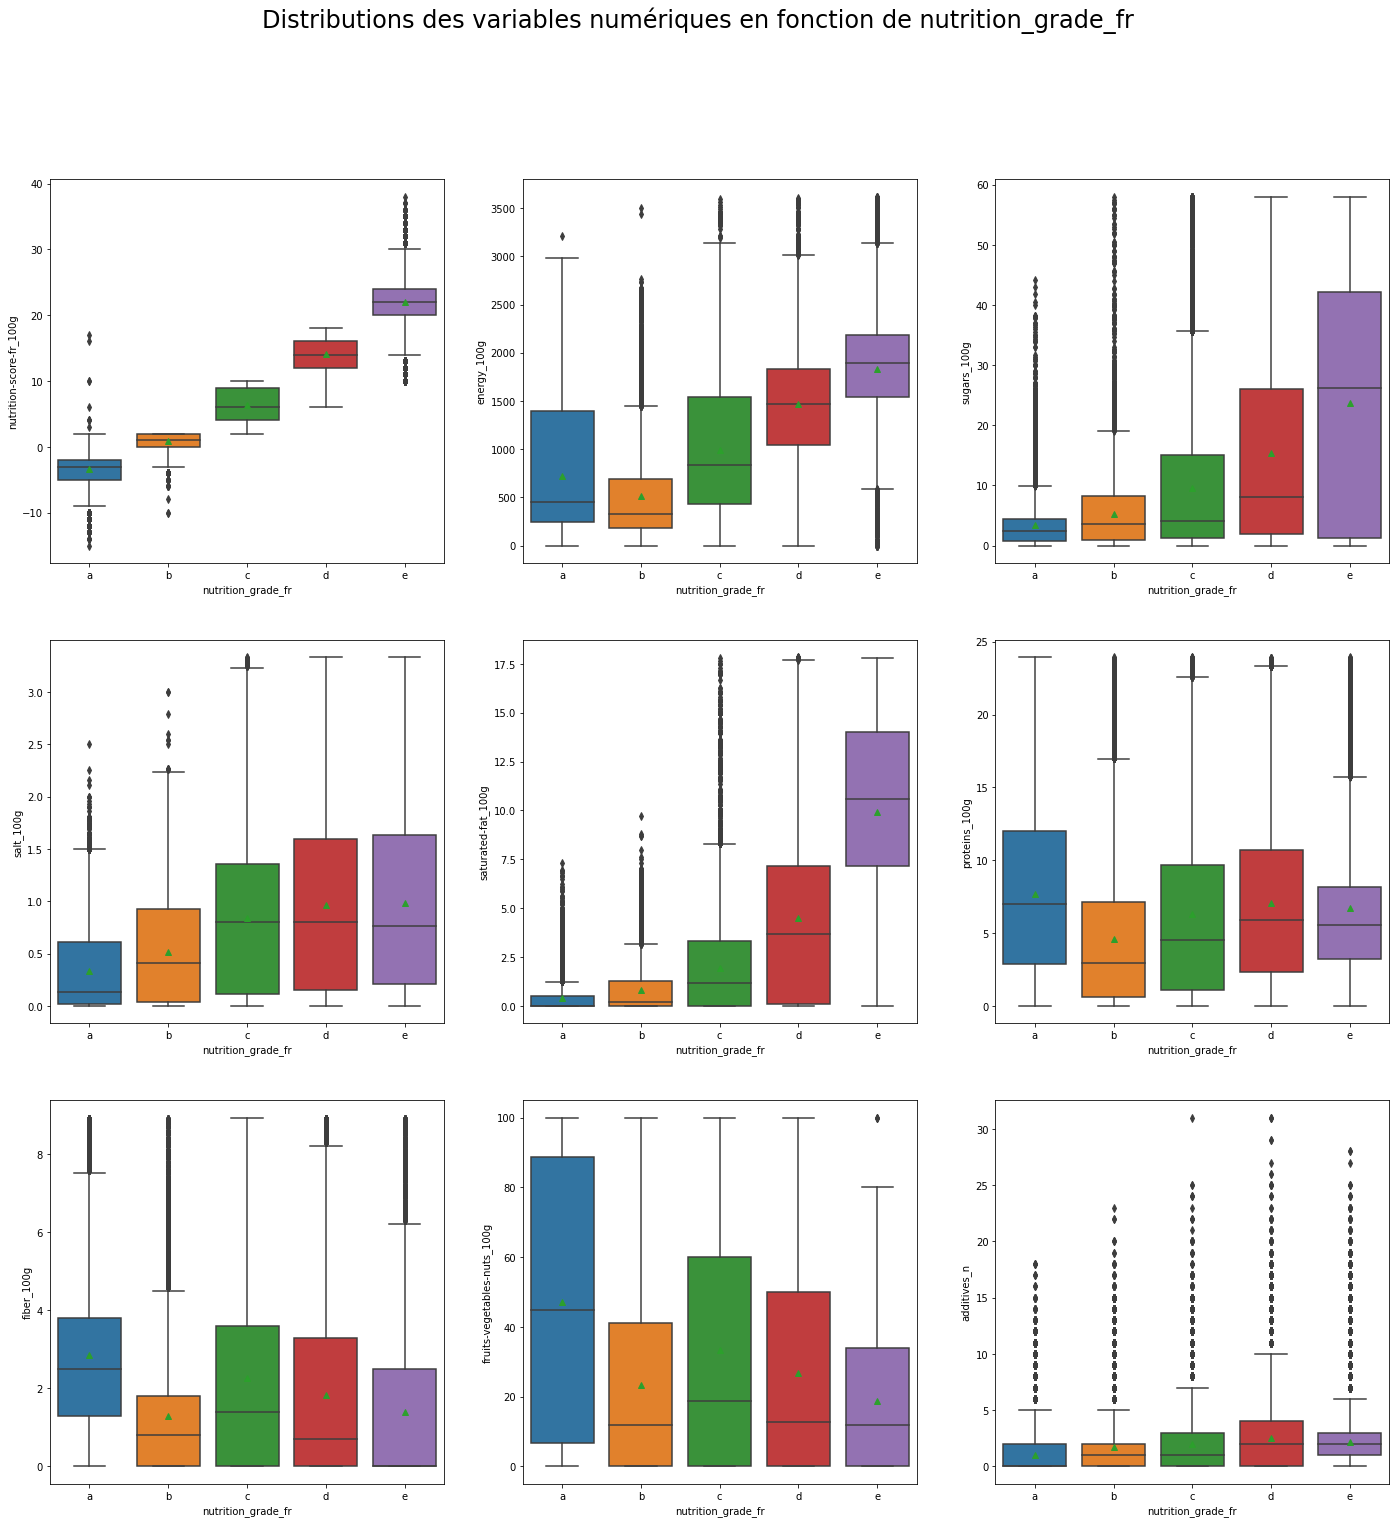

In [65]:
g_cols = []

for col in data_cleaned.columns:
    if (col.endswith('_100g')):
      g_cols.append(col)
g_cols.append('additives_n')

plot_boxplots(
    dataframe=data_cleaned, 
    categorical_column='nutrition_grade_fr', 
    numerical_columns=g_cols, 
    order_values= nutriscore_order
)

Via l'analyse de ces boxplots on s'apercoit que des outliers sont toujours présents.

Nous allons donc les passer à nan avec une fonction.

In [66]:
def nan_outliers_nutriscore(df_in, col_name, nutriscore_tuple):
  for n in nutriscore_tuple:
    subset = df_in.loc[df_in['nutrition_grade_fr'] == n, :]
    q1 = subset[col_name].quantile(0.25)
    q3 = subset[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    print('Colonne : ', col_name, ' / nutriscore : ', n,' => écart interquartile : ', iqr, ' / limite inférieure : ', fence_low, ' / limite supérieure : ', fence_high, ' => ', df_in.loc[((df_in[col_name] <= fence_low) | (df_in[col_name] >= fence_high)) & (df_in['nutrition_grade_fr'] == n), col_name].shape[0], ' outliers.')
    df_in.loc[((df_in[col_name] <= fence_low) | (df_in[col_name] >= fence_high)) & (df_in['nutrition_grade_fr'] == n), col_name] = np.nan
  df_out = df_in
  return df_out

In [67]:
for col in data_cleaned.columns:
    if (col.endswith('_100g')):
      data_cleaned = nan_outliers_nutriscore(data_cleaned, col, nutriscore_order)

Colonne :  nutrition-score-fr_100g  / nutriscore :  a  => écart interquartile :  3.0  / limite inférieure :  -9.5  / limite supérieure :  2.5  =>  331  outliers.
Colonne :  nutrition-score-fr_100g  / nutriscore :  b  => écart interquartile :  2.0  / limite inférieure :  -3.0  / limite supérieure :  5.0  =>  92  outliers.
Colonne :  nutrition-score-fr_100g  / nutriscore :  c  => écart interquartile :  5.0  / limite inférieure :  -3.5  / limite supérieure :  16.5  =>  0  outliers.
Colonne :  nutrition-score-fr_100g  / nutriscore :  d  => écart interquartile :  4.0  / limite inférieure :  6.0  / limite supérieure :  22.0  =>  303  outliers.
Colonne :  nutrition-score-fr_100g  / nutriscore :  e  => écart interquartile :  4.0  / limite inférieure :  14.0  / limite supérieure :  30.0  =>  1661  outliers.
Colonne :  energy_100g  / nutriscore :  a  => écart interquartile :  1150.0  / limite inférieure :  -1482.0  / limite supérieure :  3118.0  =>  1  outliers.
Colonne :  energy_100g  / nutrisc

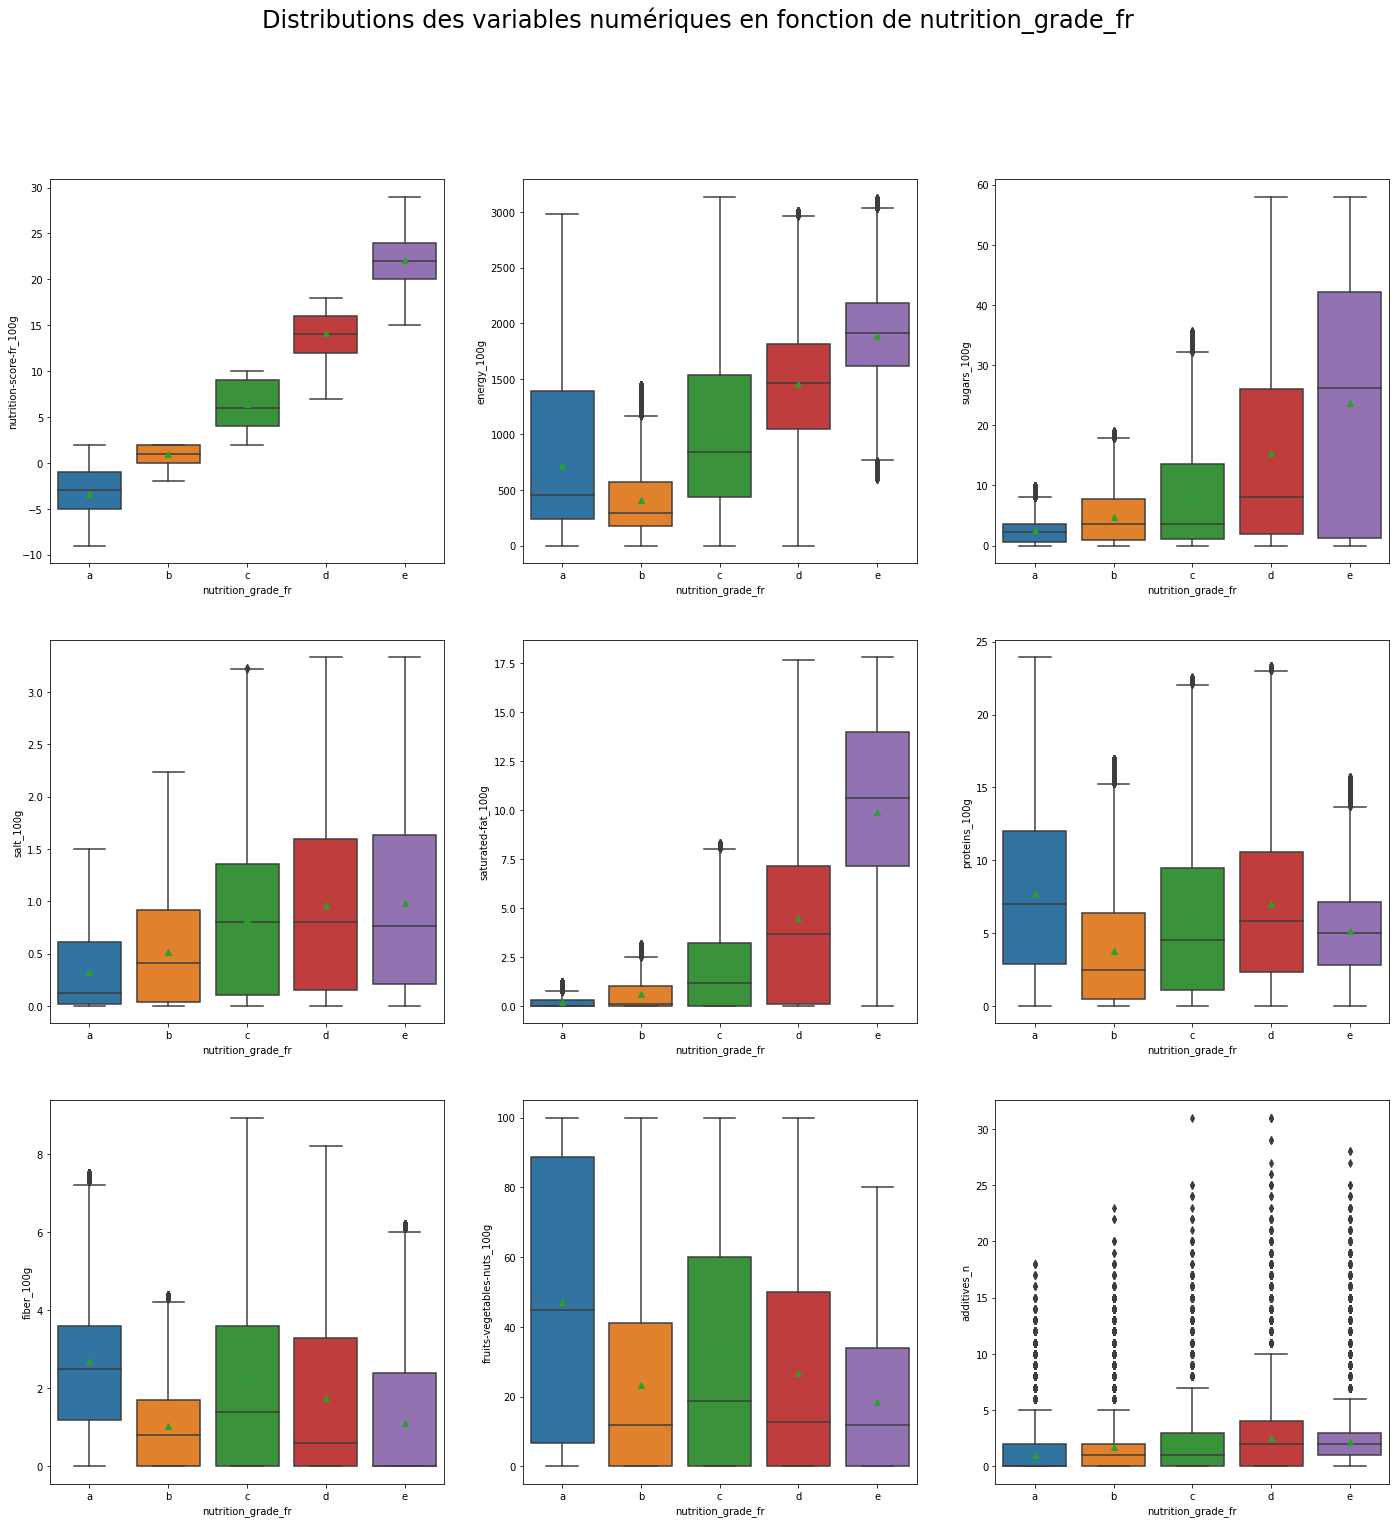

In [68]:
plot_boxplots(
    dataframe=data_cleaned, 
    categorical_column='nutrition_grade_fr', 
    numerical_columns=g_cols, 
    order_values= nutriscore_order
)

### Remplissage des valeurs manquantes

#### Fonctions

In [69]:
def setNanTo0(df_in, column):
  df_in[col].fillna(0)
  df_out = df_in
  return df_out

In [70]:
def setNanToMean(df_in, column, column_mean):
  for val_mean in df_in[column_mean].unique():
    if ((val_mean != 'nan') & (~pd.isna(val_mean))):
      mean = df_in.loc[df_in[column_mean] == val_mean, column].mean()
      print('Colonne : ', column, ' avec  ', column_mean, ' : ', val_mean, ' => moyenne : ', round(mean, 2))
      df_in.loc[df_in[column_mean] == val_mean, column] = round(mean, 2)
  df_out = df_in
  return df_out

#### Imputation par la moyenne catégorielle

##### Suivant ``` nutrition_grade_fr ```

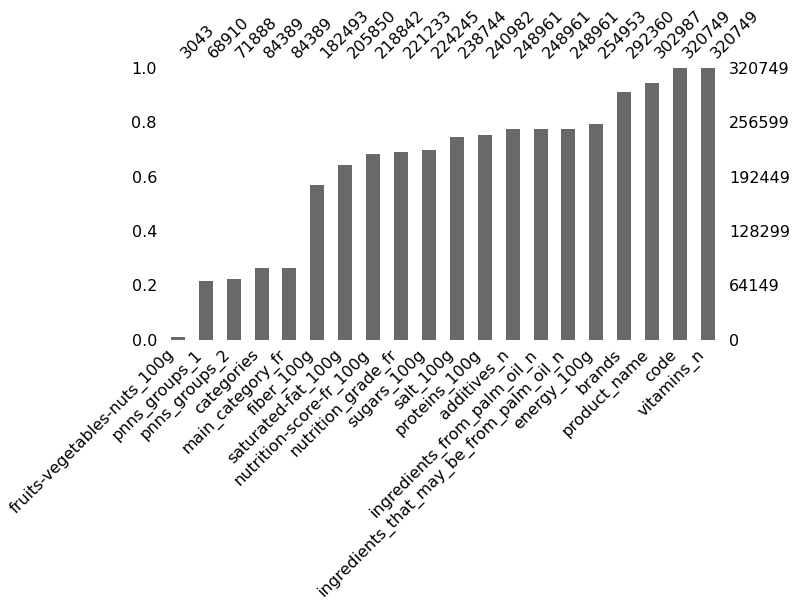

In [71]:
msno.bar(data_cleaned, figsize=(10,5),  sort='ascending')

In [72]:
for col in data_cleaned.columns:
  if (col.endswith('_100g')):
    data_cleaned = setNanToMean(data_cleaned, col, 'nutrition_grade_fr')

Colonne :  nutrition-score-fr_100g  avec   nutrition_grade_fr  :  d  => moyenne :  14.11
Colonne :  nutrition-score-fr_100g  avec   nutrition_grade_fr  :  b  => moyenne :  0.92
Colonne :  nutrition-score-fr_100g  avec   nutrition_grade_fr  :  c  => moyenne :  6.37
Colonne :  nutrition-score-fr_100g  avec   nutrition_grade_fr  :  a  => moyenne :  -3.34
Colonne :  nutrition-score-fr_100g  avec   nutrition_grade_fr  :  e  => moyenne :  22.1
Colonne :  energy_100g  avec   nutrition_grade_fr  :  d  => moyenne :  1454.04
Colonne :  energy_100g  avec   nutrition_grade_fr  :  b  => moyenne :  409.82
Colonne :  energy_100g  avec   nutrition_grade_fr  :  c  => moyenne :  992.09
Colonne :  energy_100g  avec   nutrition_grade_fr  :  a  => moyenne :  716.81
Colonne :  energy_100g  avec   nutrition_grade_fr  :  e  => moyenne :  1881.6
Colonne :  sugars_100g  avec   nutrition_grade_fr  :  d  => moyenne :  15.42
Colonne :  sugars_100g  avec   nutrition_grade_fr  :  b  => moyenne :  4.78
Colonne :  sug

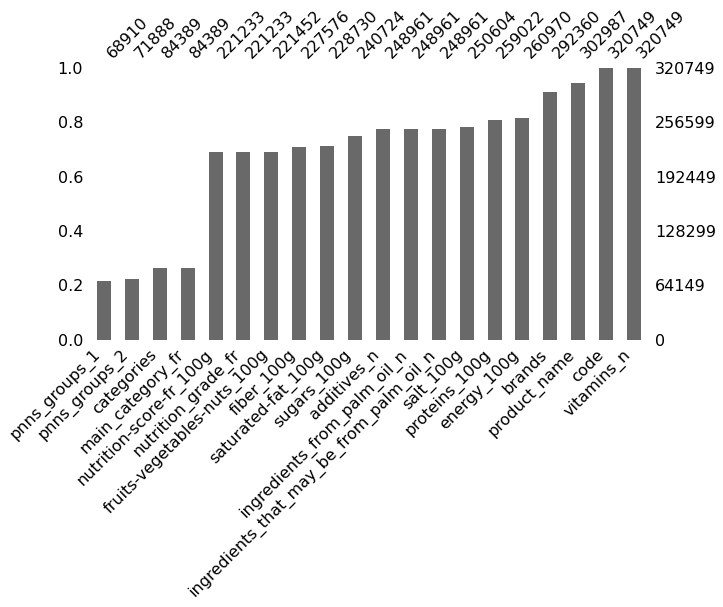

In [73]:
msno.bar(data_cleaned, figsize=(10,5),  sort='ascending')

##### Suivant ``` pnns_groups_1 ```

In [74]:
data_cleaned['main_category_fr'].unique().size

3544

In [75]:
data_cleaned['pnns_groups_1'].unique().size

10

In [76]:
for col in data_cleaned.columns:
  if (col.endswith('_100g')):
    data_cleaned = setNanToMean(data_cleaned, col, 'pnns_groups_1')

Colonne :  nutrition-score-fr_100g  avec   pnns_groups_1  :  Fruits and vegetables  => moyenne :  -1.26
Colonne :  nutrition-score-fr_100g  avec   pnns_groups_1  :  Sugary snacks  => moyenne :  16.87
Colonne :  nutrition-score-fr_100g  avec   pnns_groups_1  :  Cereals and potatoes  => moyenne :  1.86
Colonne :  nutrition-score-fr_100g  avec   pnns_groups_1  :  Composite foods  => moyenne :  3.78
Colonne :  nutrition-score-fr_100g  avec   pnns_groups_1  :  Fish meat eggs  => moyenne :  10.04
Colonne :  nutrition-score-fr_100g  avec   pnns_groups_1  :  Beverages  => moyenne :  12.32
Colonne :  nutrition-score-fr_100g  avec   pnns_groups_1  :  Fat and sauces  => moyenne :  12.36
Colonne :  nutrition-score-fr_100g  avec   pnns_groups_1  :  Milk and dairy products  => moyenne :  8.22
Colonne :  nutrition-score-fr_100g  avec   pnns_groups_1  :  Salty snacks  => moyenne :  12.28
Colonne :  energy_100g  avec   pnns_groups_1  :  Fruits and vegetables  => moyenne :  670.81
Colonne :  energy_100g

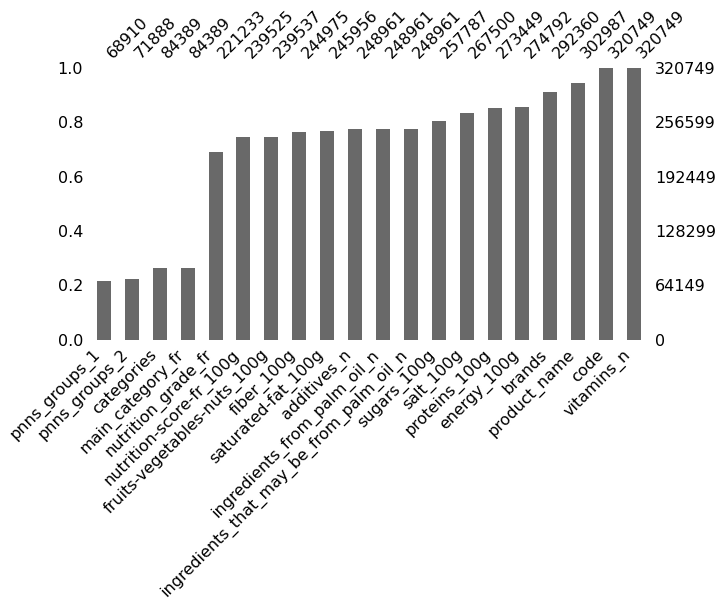

In [77]:
msno.bar(data_cleaned, figsize=(10,5),  sort='ascending')

#### Imputation avec un modèle

In [78]:
df_copy = data_cleaned.copy()

In [79]:
def choose_most_related_features(df, target, nb, features):
  print('\nChoose_most_related_features')

  if target in features : features.remove(target)

  features_list = features + [target]

  corr = df[features_list].corr()

  corr = corr.drop(target)
  correlated_features = []
  for i in range(nb):
    feature_label = corr[target].abs().idxmax()
    print(f"-- Feature selected n°{i+1} : {feature_label} with corr {round(corr[target][feature_label],3)*100}%")
    correlated_features.append(feature_label)
    corr = corr.drop(feature_label)
  return correlated_features

In [80]:
def make_imputation(df, target, method):
  print('\nImputation')
  df['pnns_groups_2'] = df['pnns_groups_2'].apply(lambda x : 'nan' if pd.isna(x) else x) # Do this because if not, it is impossible select the nan group

  for group2 in df['pnns_groups_2'].unique():
    sub_df = df[df['pnns_groups_2'] == str(group2)][target]
    print(f"------ {group2} --> {sub_df.shape[0]} row and {sub_df.isna().values.sum()} imputations found !")
    sub_df[sub_df.isna()]['target_imputed'] = 1
    imputer = SimpleImputer(missing_values=np.nan, strategy=method)
    imp_ser = imputer.fit_transform(sub_df.values.reshape(-1, 1))
    df.loc[df['pnns_groups_2'] == group2, target] = imp_ser

  return df

In [81]:
def make_regression(df, features, target):
  print('\nRegression')
  #Train
  columns_used = features + [target]
  train_df = df[columns_used]
  train_df = train_df.dropna()
  
  train_features = train_df[features]
  train_target = train_df[target]


  predict_df = df[df[target].isna()]

  predict_df = predict_df[features].dropna()
  if (predict_df.shape[0] == 0):
    print('-- Not enough valid features to make any prediction. At least one feature in each prediction row is missing. Will do it by imputation.')
  else:
    print(f"-- {predict_df.shape[0]} rows eligible to prediction")
    predict_features = predict_df[features]

    X = train_features
    y = train_target
    regr = linear_model.LinearRegression()
    print('---- fitting...')
    regr.fit(X, y)
    print('---- fitted')
    predict_df[target] = regr.predict(predict_features)
    df.loc[predict_df.index,target] = predict_df
  return df

In [82]:
nb_correlated_features = 4
interesting_features = ['energy_100g', 'sugars_100g', 'salt_100g', 'saturated-fat_100g', 'proteins_100g', 'fiber_100g', 'fruits-vegetables-nuts_100g']

most_related_features = choose_most_related_features(df_copy, 'nutrition-score-fr_100g' , nb_correlated_features, interesting_features)

regression_df = make_regression(df_copy, most_related_features, 'nutrition-score-fr_100g')

imputed_df = make_imputation(regression_df, 'nutrition-score-fr_100g', 'mean') # Faire une moyenne en prenant la même catégorie de produits




Choose_most_related_features
-- Feature selected n°1 : sugars_100g with corr 99.2%
-- Feature selected n°2 : saturated-fat_100g with corr 95.89999999999999%
-- Feature selected n°3 : energy_100g with corr 95.39999999999999%
-- Feature selected n°4 : salt_100g with corr 91.7%

Regression
-- 396 rows eligible to prediction
---- fitting...
---- fitted

Imputation
------ nan --> 248861 row and 77957 imputations found !
------ Vegetables --> 3774 row and 0 imputations found !
------ Biscuits and cakes --> 4561 row and 0 imputations found !
------ Bread --> 1838 row and 0 imputations found !
------ Legumes --> 929 row and 0 imputations found !
------ Pizza pies and quiche --> 515 row and 0 imputations found !
------ Meat --> 1694 row and 0 imputations found !
------ Sweets --> 4698 row and 0 imputations found !
------ Non sugared beverages --> 4302 row and 0 imputations found !
------ Sweetened beverages --> 2170 row and 0 imputations found !
------ Dressings and sauces --> 3602 row and 0 i

In [83]:
df_copy.loc[:,'nutrition-score-fr_100g'] = imputed_df['nutrition-score-fr_100g']

In [84]:
for col in df_copy.columns:
  if (((col.endswith('_100g')) & (col != 'nutrition-score-fr_100g')) | (col.endswith('_n'))):
    df_copy[col] = df_copy[col].fillna(0)

In [85]:
for col in df_copy.columns:
  if ~(((col.endswith('_100g')) & (col != 'nutrition-score-fr_100g')) | (col.endswith('_n'))):
    if ((col != 'nutrition_grade_fr') & (col != 'nutrition-score-fr_100g')):
      df_copy[col] = df_copy[col].fillna('Autres')

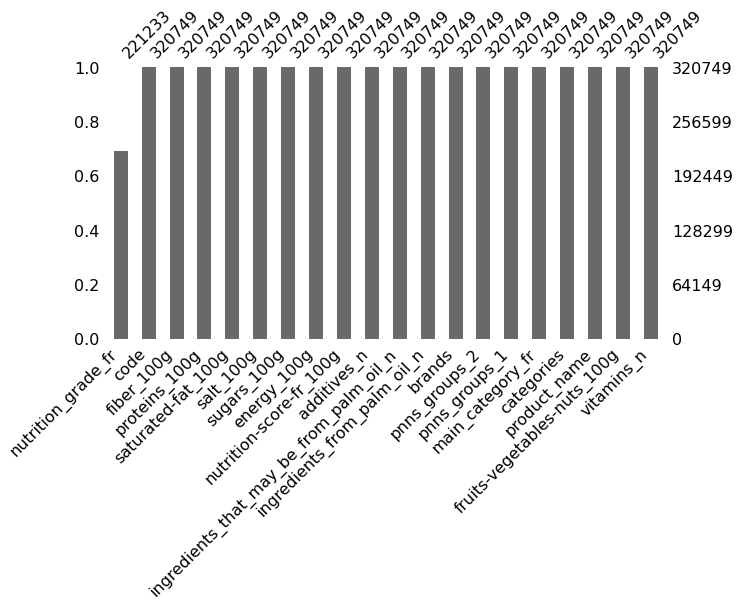

In [86]:
msno.bar(df_copy, figsize=(10,5),  sort='ascending')

In [87]:
df_copy['nutrition_grade_fr'].unique()

array([nan, 'd', 'b', 'c', 'a', 'e'], dtype=object)

In [88]:
df_copy.loc[(df_copy['nutrition-score-fr_100g'] <= -1) & (df_copy['nutrition_grade_fr'].isnull()), 'nutrition_grade_fr'] = 'a'
df_copy.loc[(df_copy['nutrition-score-fr_100g'] >= -1) & (df_copy['nutrition-score-fr_100g'] < 3) & (df_copy['nutrition_grade_fr'].isnull()), 'nutrition_grade_fr'] = 'b'
df_copy.loc[(df_copy['nutrition-score-fr_100g'] >= 3) & (df_copy['nutrition-score-fr_100g'] < 11) & (df_copy['nutrition_grade_fr'].isnull()), 'nutrition_grade_fr'] = 'c'
df_copy.loc[(df_copy['nutrition-score-fr_100g'] >= 11) & (df_copy['nutrition-score-fr_100g'] < 19) & (df_copy['nutrition_grade_fr'].isnull()), 'nutrition_grade_fr'] = 'd'
df_copy.loc[(df_copy['nutrition-score-fr_100g'] >= 19) & (df_copy['nutrition_grade_fr'].isnull()), 'nutrition_grade_fr'] = 'e'

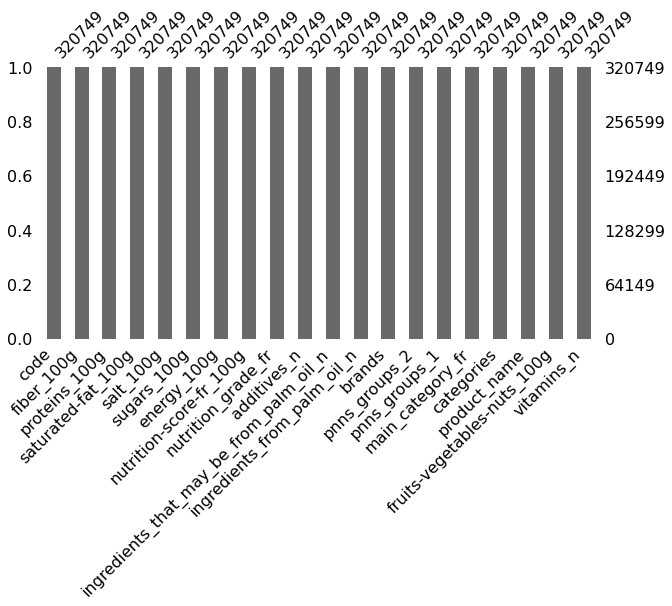

In [89]:
msno.bar(df_copy, figsize=(10,5),  sort='ascending')

# Analyses des données

## Analyse univariée

### Features numériques

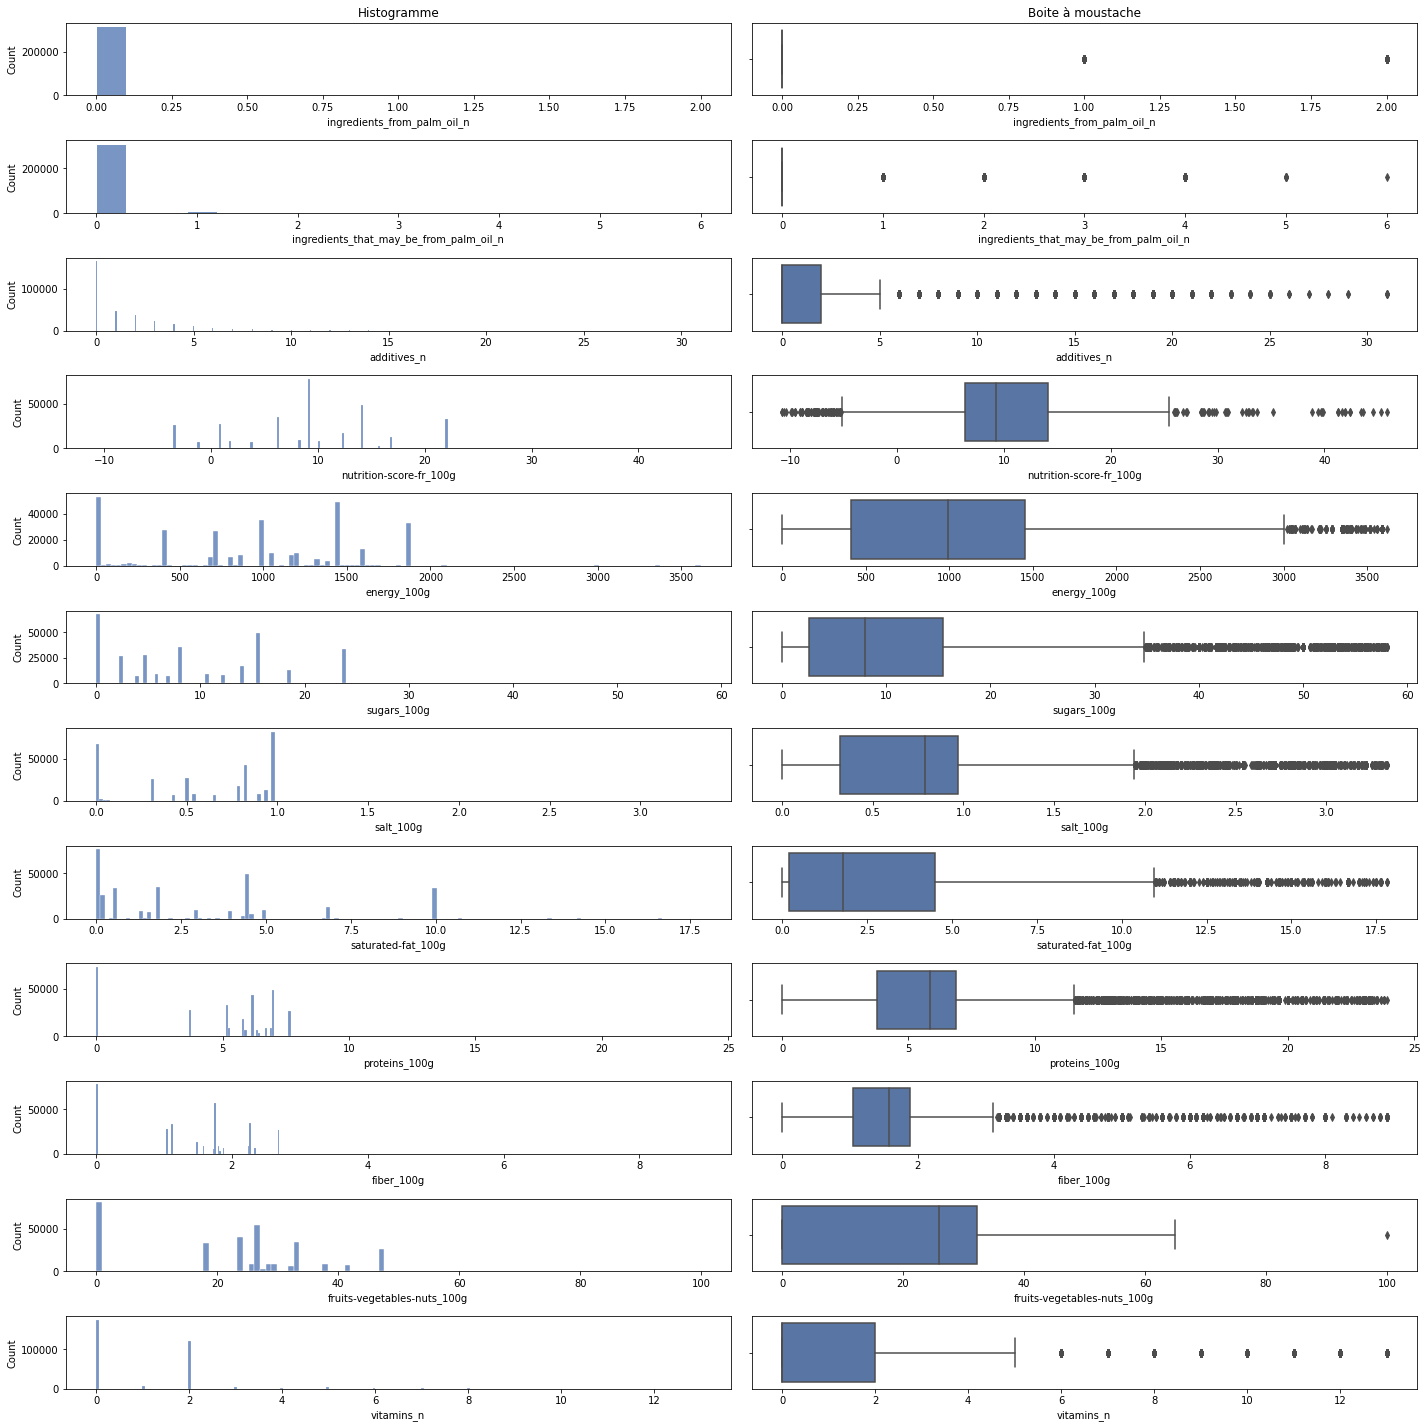

In [90]:
# Analysis of the data repartition on the interesting features columns after cleaning

interesting_features_complete = []

for col in df_copy.columns:
  if ((col.endswith('_100g')) | (col.endswith('_n'))):
    interesting_features_complete.append(col)

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(len(interesting_features_complete), 2, figsize=(20, 20))
cols = ['Histogramme','Boite à moustache']
for ax, col in zip(axis[0], cols):
    ax.set_title(col)
sns.set_theme(style="whitegrid")

index = 0

for column in interesting_features_complete:
  # histograme
  sns.histplot(ax=axis[index,0], x=df_copy[column])

  # Boxplot
  sns.boxplot(ax=axis[index,1], x=df_copy[column])
  index = index + 1
figure.tight_layout()
plt.show()

In [91]:
df_copy[interesting_features_complete].describe()

ingredients_from_palm_oil_n  ingredients_that_may_be_from_palm_oil_n  \
count                320749.000000                            320749.000000   
mean                      0.015258                                 0.042881   
std                       0.124069                                 0.238286   
min                       0.000000                                 0.000000   
25%                       0.000000                                 0.000000   
50%                       0.000000                                 0.000000   
75%                       0.000000                                 0.000000   
max                       2.000000                                 6.000000   

         additives_n  nutrition-score-fr_100g    energy_100g    sugars_100g  \
count  320749.000000            320749.000000  320749.000000  320749.000000   
mean        1.502995                 9.262941     950.328867       9.507656   
std         2.347669                 6.959906     635.185760       8.325962   
min         0.000000               -10.752098       0.000000       0.000000   
25%         0.000000                 6.370000     409.820000       2.550000   
50%         0.000000                 9.287925     992.090000       8.000000   
75%         2.000000                14.110000    1454.040000      15.420000   
max        31.000000                45.808679    3615.000000      58.000000   

           salt_100g  saturated-fat_100g  proteins_100g     fiber_100g  \
count  320749.000000       320749.000000  320749.000000  320749.000000   
mean        0.605540            2.880636       4.727324       1.361935   
std         0.418796            3.239278       2.934046       0.923096   
min         0.000000            0.000000       0.000000       0.000000   
25%         0.320000            0.200000       3.750000       1.040000   
50%         0.790000            1.810000       5.860000       1.570000   
75%         0.970000            4.500000       6.890000       1.880000   
max         3.332480           17.800000      23.900000       8.900000   

       fruits-vegetables-nuts_100g     vitamins_n  
count                320749.000000  320749.000000  
mean                     21.868737       1.064786  
std                      14.590986       1.450517  
min                       0.000000       0.000000  
25%                       0.000000       0.000000  
50%                      25.960000       0.000000  
75%                      32.190000       2.000000  
max                      99.900000      13.000000

### Features catégorielles

Nous allons analyser les features catégorielles, dans un premier tmeps nous allons les sélectionner et compter le nombre de modalités de chacune.

In [92]:
features_cat = df_copy.select_dtypes(include=['object']).columns

features_cat = features_cat.drop(['code', 'product_name'])

high_modal = []
low_modal = []

for col in features_cat:
  print('Colonne : ', col, ' => ', df_copy[col].unique().size, ' modalités')
  if df_copy[col].unique().size > 100:
    high_modal.append(col)
  else:
    low_modal.append(col)

Colonne :  categories  =>  36976  modalités
Colonne :  main_category_fr  =>  3544  modalités
Colonne :  pnns_groups_1  =>  10  modalités
Colonne :  pnns_groups_2  =>  37  modalités
Colonne :  brands  =>  58053  modalités
Colonne :  nutrition_grade_fr  =>  5  modalités


Nous avons donc des features avec un nombre de modalité assez grands par exemple : `brands`, `categories` et `main_category_fr`

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


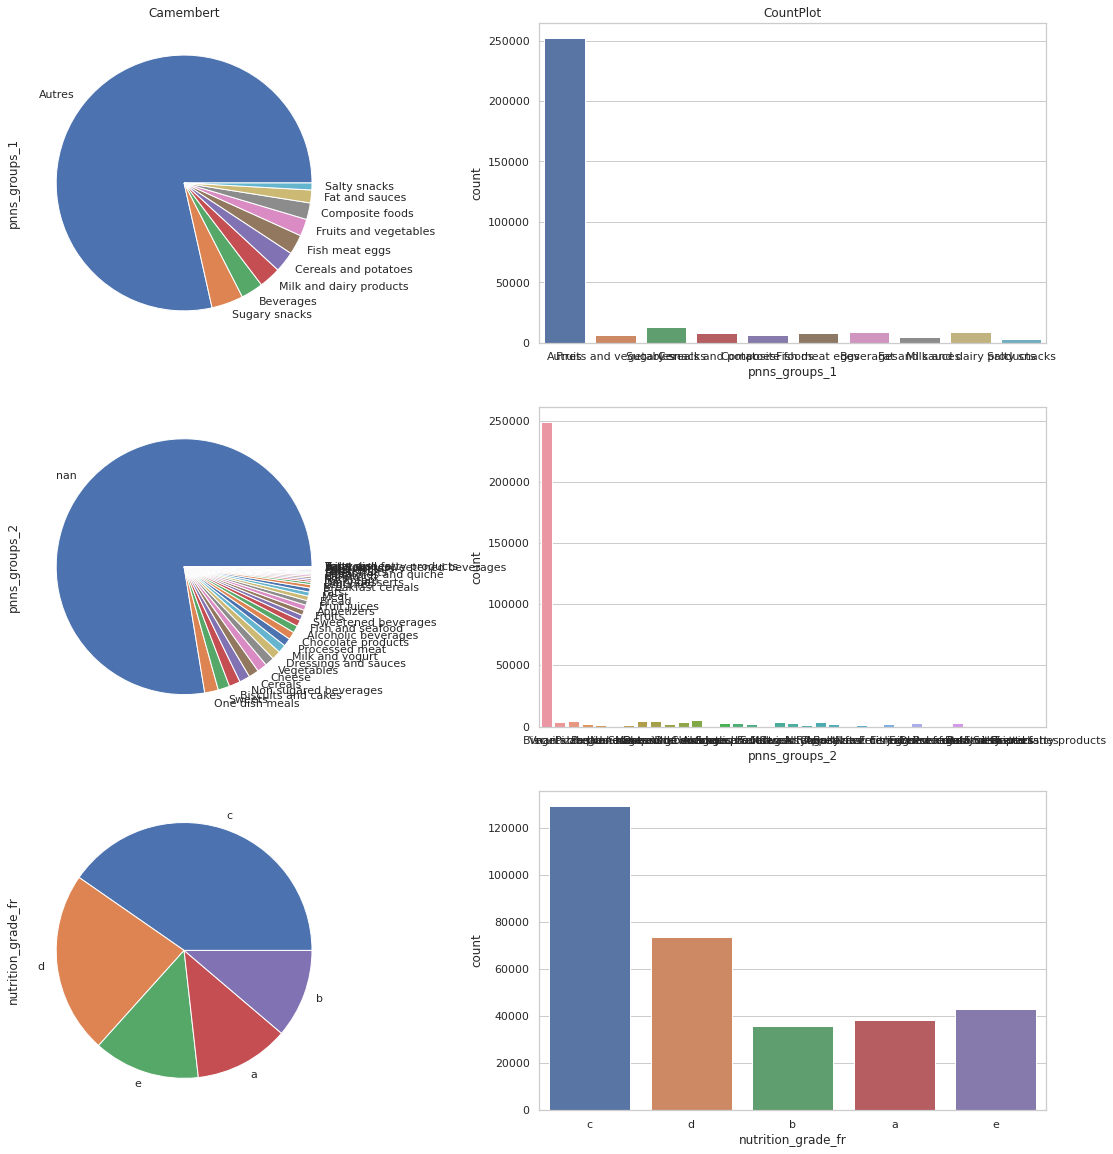

In [93]:
figure, axis = plt.subplots(len(low_modal), 2, figsize=(20, 20))
cols = ['Camembert','CountPlot']
for ax, col in zip(axis[0], cols):
    ax.set_title(col)
sns.set_theme(style="whitegrid")

index = 0

for column in low_modal:
  # camembert
  df_copy[column].value_counts().plot(kind="pie", ax=axis[index,0])

  # Countplot
  sns.countplot(df_copy[column], ax=axis[index,1])
  index = index + 1
#figure.tight_layout()
plt.show()

On observe donc que les variables pnns_groups_1 et pnns_groups_2 sont difficilement exploitables étant donné que la majeure partie des données sont concentrées dans la modalité "Autres". 

On peut analyser le jeu de données en excluant ces valeurs :

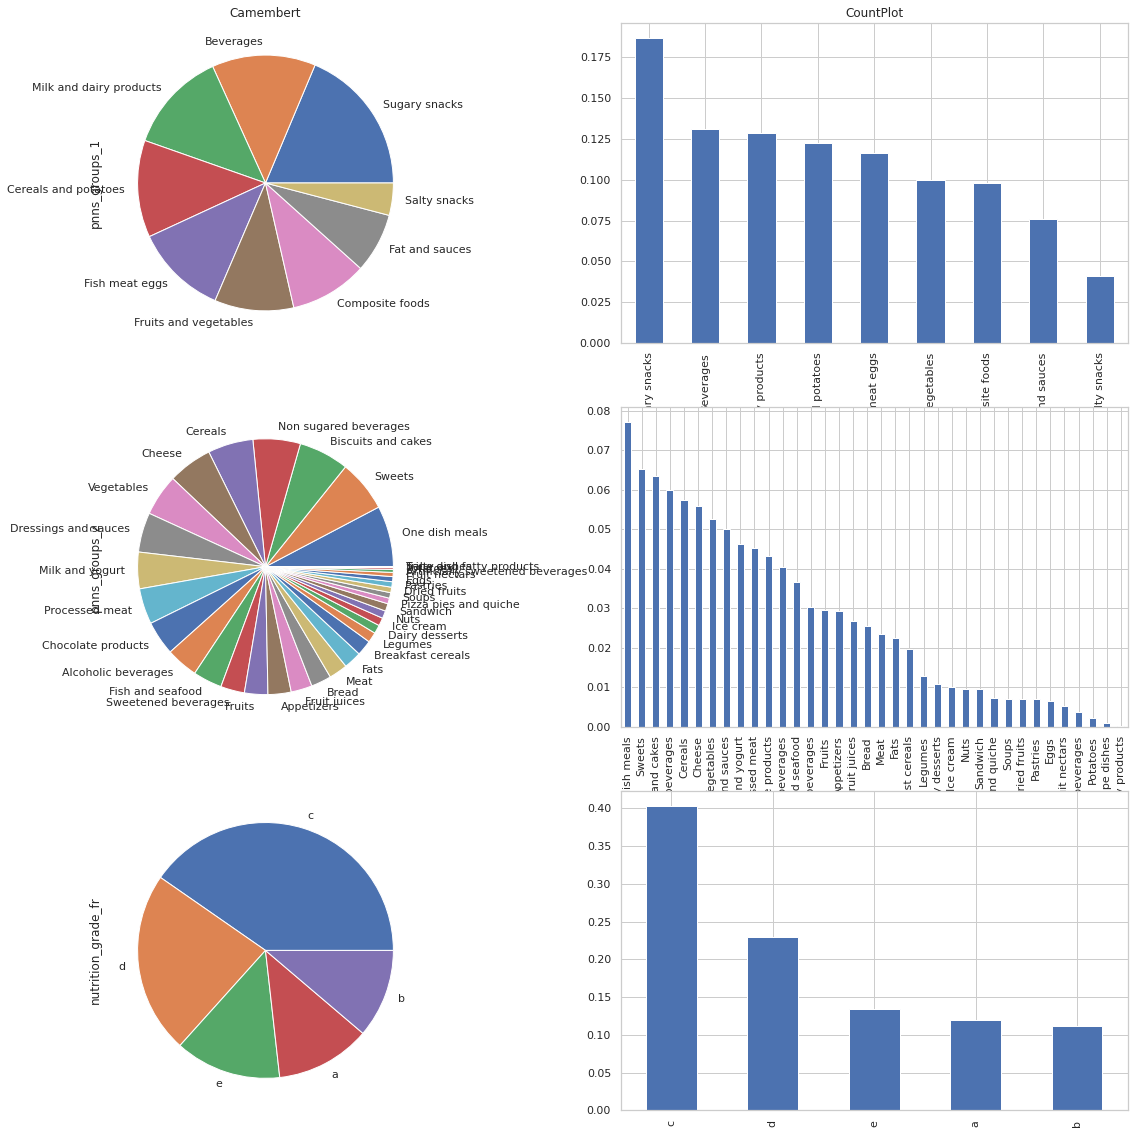

In [94]:
figure, axis = plt.subplots(len(low_modal), 2, figsize=(20, 20))
cols = ['Camembert','CountPlot']
for ax, col in zip(axis[0], cols):
    ax.set_title(col)
sns.set_theme(style="whitegrid")

index = 0

for column in low_modal:
  # camembert
  df_copy.loc[(df_copy[column] != 'Autres') & (df_copy[column] != 'nan'),column].value_counts().plot(kind="pie", ax=axis[index,0])

  # Countplot
  #sns.countplot(df_copy.loc[(df_copy[column] != 'Autres') & (df_copy[column] != 'nan'),column], ax=axis[index,1])
  df_copy.loc[(df_copy[column] != 'Autres') & (df_copy[column] != 'nan'),column].value_counts(normalize=True).plot(kind='bar', ax=axis[index,1])
  index = index + 1
#figure.tight_layout()
plt.show()

On peut observer que :


*   Pour la variable pnns_groups_1 : les modalités sont representés de manière équitable sauf pour la modalité `Sugary snacks` qui est sur-representé et la modalité `Salty snacks`qui est sous-representée
*   Pour la variable pnns_groups_2 : La modalité `One dish meal` est la plus représentée avec un peu moins de 8 %



## Analyse bivariée 

### Features numériques

#### Heatmap de corrélation

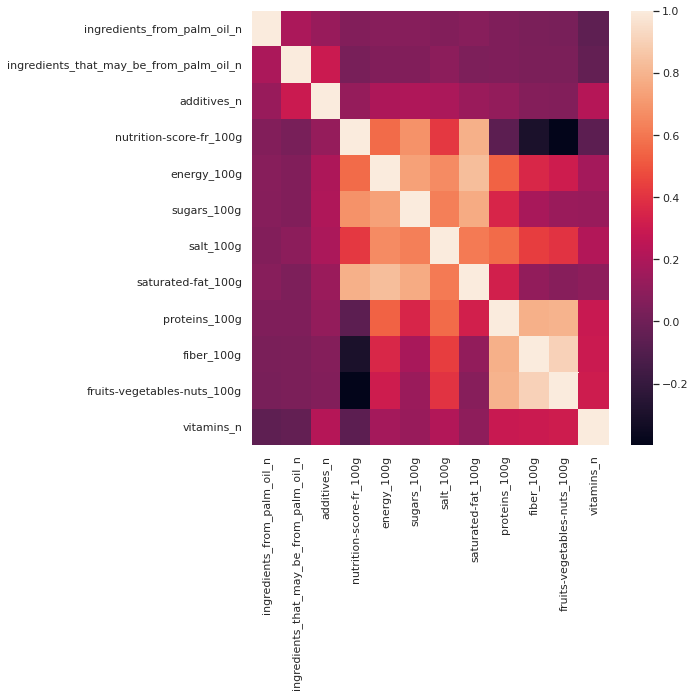

In [95]:
corr = df_copy[interesting_features_complete].corr()

# To show heatmap
fig, axs = plt.subplots(1,1,figsize=(8,8))
sns.heatmap(corr)
plt.show()

Grâçe à ce graphique on peut voir que : 


*   le nutriscore est très corrélé aux acides gras saturés mais aussi aux sucres. Il est quelque peu corrélé avec le sel et avec la quantité d'énergie apporté par le produit. Etonnement on observe qu'il n'est pas ou très peu corrélé avec la teneur en fruit/légume/noix, les fibres et les protéines.
*   Le nombre de vitamines n'est pas forcément correlé à la quantité de fruit/légume/noix ce qui parait assez étonnant.
*   La quantité d'énergie est correlée à la teneur en acides gras saturés et en sucres



#### Pairplots

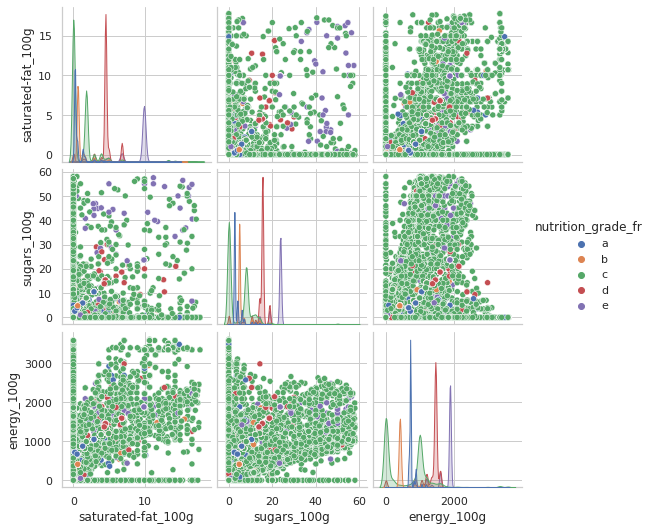

In [96]:
features_pairplot = ['saturated-fat_100g', 'sugars_100g', 'energy_100g', 'nutrition_grade_fr']

sns.pairplot(df_copy[features_pairplot]
             , hue='nutrition_grade_fr'
             , hue_order='abcde')

On remarque que le certains individus sont incohérents :


*   Nous avons des points avec le sucre > 0g mais avec l'énergie à 0 ce qui est impossible.
*   Nous avons des points avec les acides gras saturés > 0g mais avec l'énergie à 0 ce qui est impossible.

Cela nécessite un nettoyage supplémentaire.


##### Nettoyage métier

1g de sucre = 16 kJ d'énergie

Source : https://www.fatsecret.fr/calories-nutrition/g%C3%A9n%C3%A9rique/sucre?portionid=55855&portionamount=1,000

In [97]:
before = df_copy.shape[0]
df_copy = df_copy.loc[df_copy['energy_100g'] >= 16 * df_copy['sugars_100g']]
after = df_copy.shape[0]
print(before-after, ' lignes supprimées')

1521  lignes supprimées


1g d'acide gras saturés = 37 kJ d'énergie

Source : https://fr.wikipedia.org/wiki/Acide_gras

In [98]:
before = df_copy.shape[0]
df_copy = df_copy.loc[df_copy['energy_100g'] >= 37 * df_copy['saturated-fat_100g']]
after = df_copy.shape[0]
print(before-after, ' lignes supprimées')

285  lignes supprimées


### Features numériques / catégorielles

#### Energie et Nutriscore

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Violinplot énergie vs nutri-score')

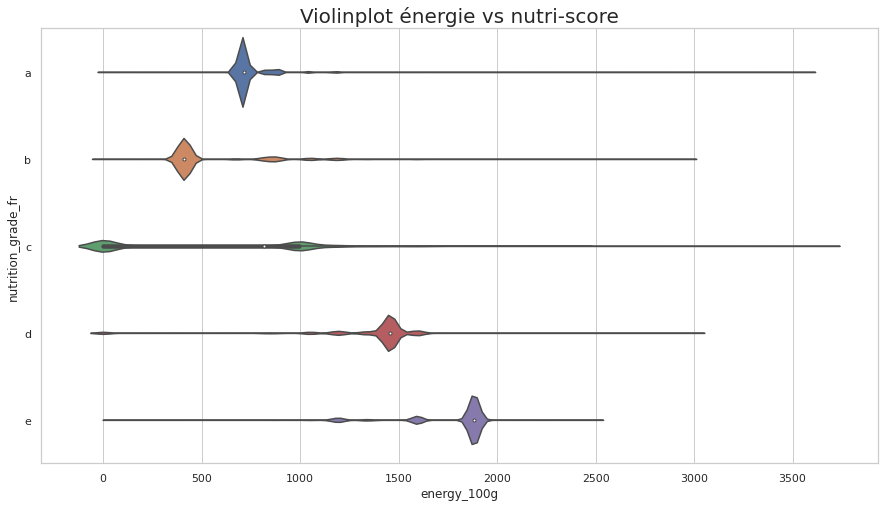

In [99]:
plt.figure(figsize=(15,8))
sns.violinplot(df_copy.energy_100g ,df_copy.nutrition_grade_fr, data = df_copy, order ='abcde')
plt.title("Violinplot énergie vs nutri-score", fontsize=20 )

On voit que plus le niveau d'énergie augmente plus la note nutriscore baisse, ce qui est assez logique avec les produits très sucrés et/ou très gras.

#### Bloxplots avec le nutriscore pour les variables numériques

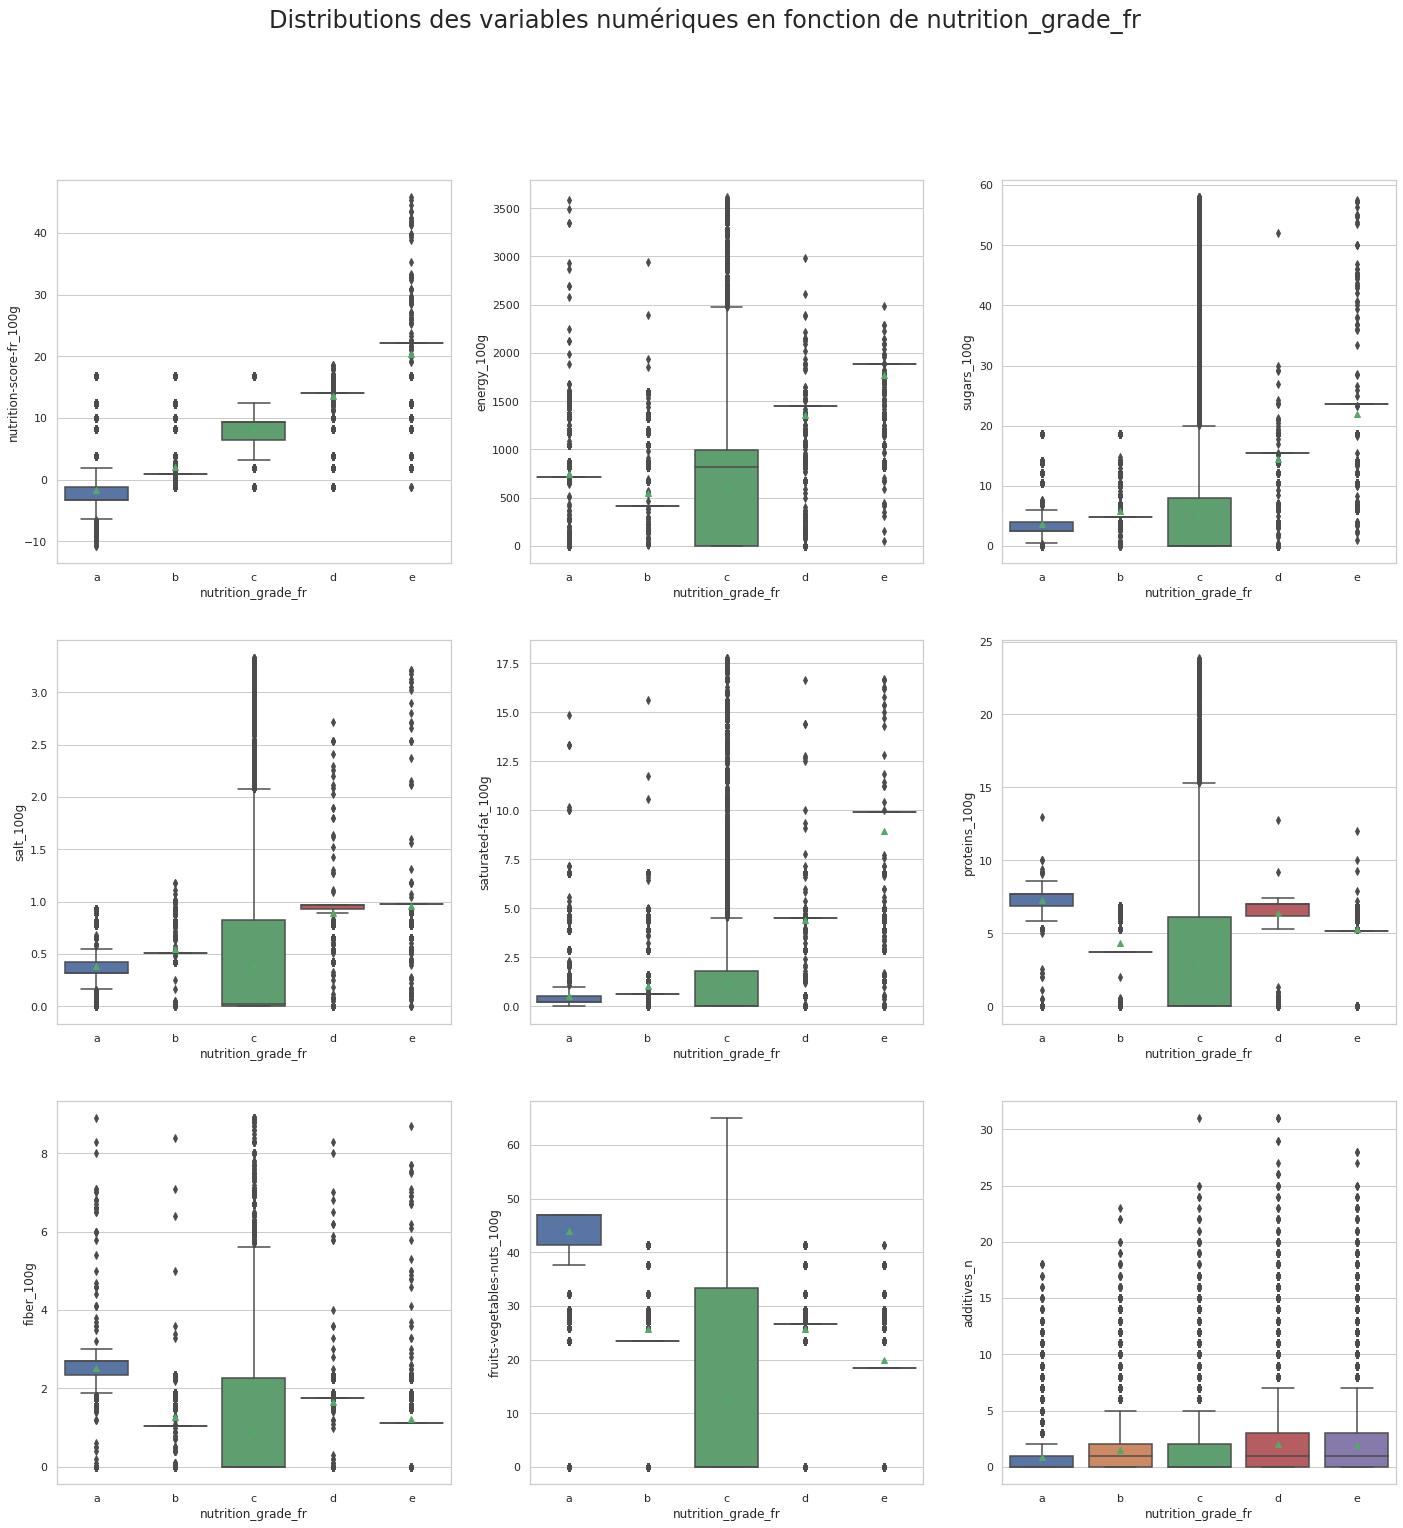

In [100]:
plot_boxplots(
    dataframe=df_copy, 
    categorical_column='nutrition_grade_fr', 
    numerical_columns=g_cols, 
    order_values= nutriscore_order
)

On voit que le nutriscore C renferme une grande partie des individus de notre dataframe.

Logiquement on observe que plus le nutriscore est bon moins il y a de sel, d'acides gras et de sucres.

En revanche le niveau de protéines reste assez similaire suivant le nutriscore.

NB : D'autres méthode d'imputation et de nettoyage serait plus efficient (plus de temps)

#### Corrélation du nutriscore et des variables numériques

In [101]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

In [102]:
X = "nutrition_grade_fr" # qualitative
for Y in interesting_features_complete:
  i= eta_squared(df_copy[X],df_copy[Y])          
  if not pd.isna(i):
    print ( 'eta_squared(' + X + ', ' + Y +') =',i ) 

eta_squared(nutrition_grade_fr, ingredients_from_palm_oil_n) = 0.011261554904287126
eta_squared(nutrition_grade_fr, ingredients_that_may_be_from_palm_oil_n) = 0.00482259639423268
eta_squared(nutrition_grade_fr, additives_n) = 0.029019408997116945
eta_squared(nutrition_grade_fr, nutrition-score-fr_100g) = 0.8550168780770688
eta_squared(nutrition_grade_fr, energy_100g) = 0.48259834094230597
eta_squared(nutrition_grade_fr, sugars_100g) = 0.57194199323125
eta_squared(nutrition_grade_fr, salt_100g) = 0.33121575818670956
eta_squared(nutrition_grade_fr, saturated-fat_100g) = 0.7339221024523054
eta_squared(nutrition_grade_fr, proteins_100g) = 0.32501238339868993
eta_squared(nutrition_grade_fr, fiber_100g) = 0.315675654683046
eta_squared(nutrition_grade_fr, fruits-vegetables-nuts_100g) = 0.4525277429385052
eta_squared(nutrition_grade_fr, vitamins_n) = 0.05580925852776575


In [103]:
# Calcul de E² pour chaque variable
anova=pd.DataFrame(columns=['eta_squared'])
for col in interesting_features_complete:
    anova.loc[col] = eta_squared(df_copy['nutrition_grade_fr'],df_copy[col])

# Classement des valeurs
sorted_anova = anova.sort_values(by='eta_squared', ascending=False)

# Graphique
fig = px.scatter(sorted_anova,
    x=sorted_anova.index,
    y=sorted_anova['eta_squared'],
    color='eta_squared',
    size='eta_squared',
    title='Correlation entre le Nutri-Score et les variables numériques',
    width=1200,
    height=600,
)
fig.show()

#### ANOVA

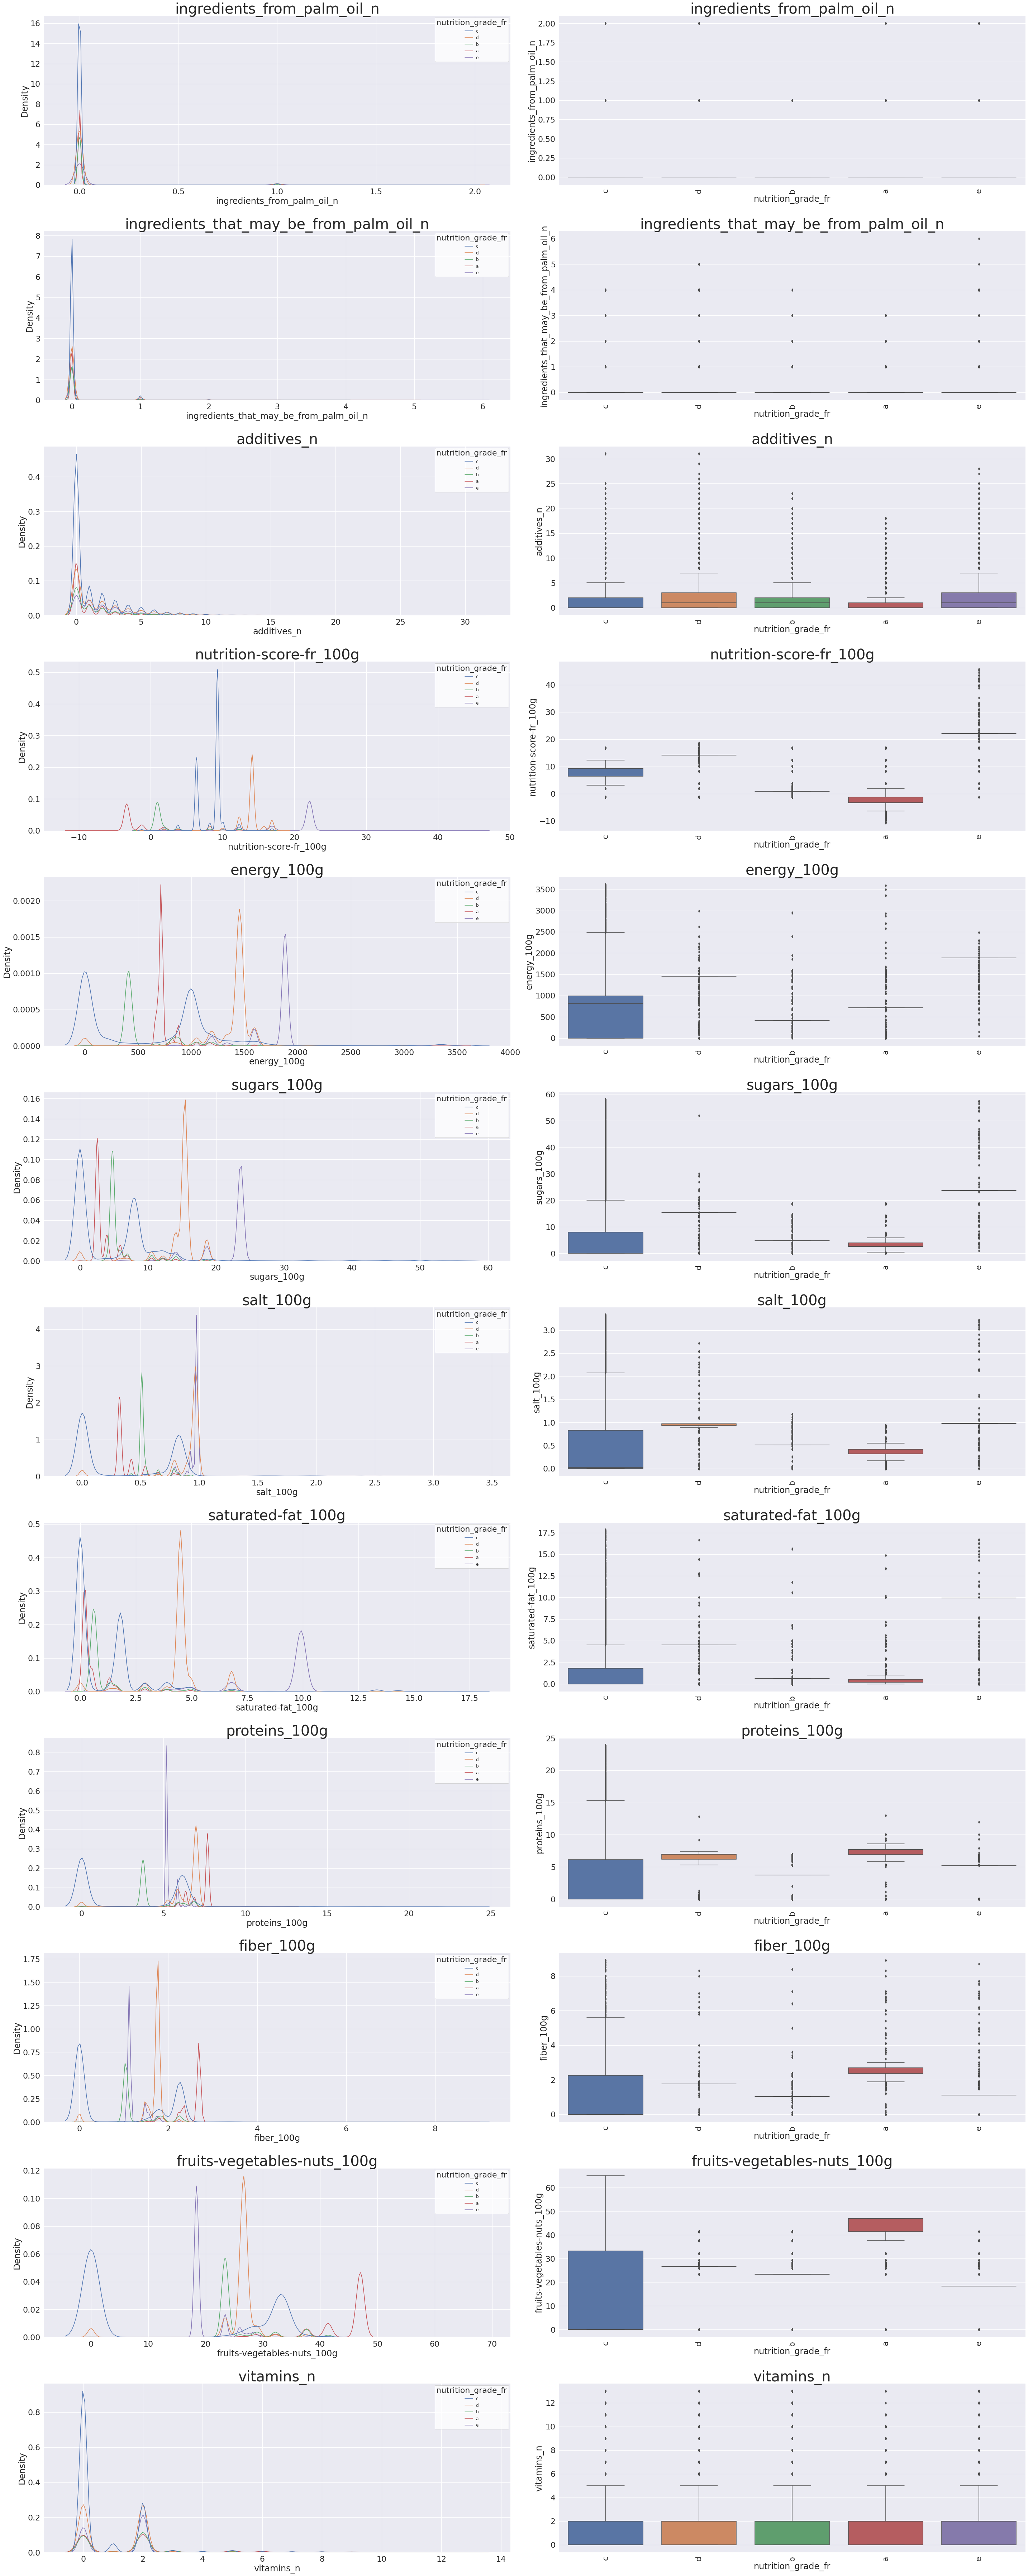

In [104]:
#Target repartition analysis depending of the group

features = ['']

sns.set(font_scale = 2)
figure, axis = plt.subplots(len(interesting_features_complete), 2, figsize=(40,100))


cols = ['Histogramme','Boite à moustache']
axis[0, 0].set_title(cols[0],fontsize=20)
axis[0, 1].set_title(cols[1],fontsize=20)

sns.set_theme(style="whitegrid")

index = 0

for column in interesting_features_complete:

  
  axHist = axis[index, 0]
  axBoxP = axis[index, 1]

  # On rajoute le titre pour chaque feature
  axHist.set_title(column,fontsize=40)
  axBoxP.set_title(column,fontsize=40)

  axBoxP.tick_params(axis='x', rotation=90)


  # histograme
  sns.kdeplot(ax=axis[index,0], data=df_copy,  x = column, hue = 'nutrition_grade_fr')
  plt.setp(axis[index,0].get_legend().get_texts(), fontsize='12') # for legend text
  plt.setp(axis[index,0].get_legend().get_title(), fontsize='22') # for legend title

  # Boxplot
  sns.boxplot(ax=axis[index,1], data=df_copy, x='nutrition_grade_fr', y = column)

  index = index + 1


figure.tight_layout()
plt.show()

##### Corrélation des variables numériques entre elles

In [105]:
fig = px.scatter_matrix(df_copy.sample(frac=.01),
    dimensions=[
        'energy_100g', 
        'saturated-fat_100g', 
        'sugars_100g', 
        'salt_100g', 
        'nutrition-score-fr_100g',
    ],
    color="nutrition_grade_fr",
    symbol="nutrition_grade_fr",
    category_orders={'nutrition_grade_fr': nutriscore_order},
    hover_data=['product_name', 'main_category_fr'],
    opacity=.2,
    width=1200,
    height=1200,
    title="Distribution des produits suivant les valeurs nutritionnelles et le nutriscore",
)
fig.update_traces(
    showupperhalf=False,
    diagonal_visible=False,
)
fig.show()

In [106]:
corr = df_copy[[
        'additives_n', 
        'energy_100g', 
        'saturated-fat_100g', 
        'sugars_100g', 
        'salt_100g', 
        'fruits-vegetables-nuts_100g', 
        'fiber_100g',
        'proteins_100g',
    ]].corr()

fig = px.imshow(corr.where(np.tril(np.ones(corr.shape), -1).astype(bool)),
    title="Coefficient de Pearson des variables nutritionnelles",
    width=1200,
    height=600,
)
fig.show()

##### Hypothese

Hypothèse 0 : La teneur en sel n'est pas directement lié à la catégorie de produit

In [107]:
anova_group_salt = smf.ols('salt_100g~pnns_groups_2', data=df_copy).fit()
print(anova_group_salt.summary())

if sm.stats.anova_lm(anova_group_salt, typ=2)['PR(>F)'][f"pnns_groups_2"] >= 0.05 :
  print("\n\n\nAvec un test de Fisher, la catégorie a une influence remarquable sur la teneur en sel du produit. L'hypothèse est rejetée.")
else:
  print("\n\n\nAvec un test de Fisher, la catégorie n'a pas une influence remarquable sur la teneur en sel du produit. L'hypothèse est acceptée.")

                            OLS Regression Results                            
Dep. Variable:              salt_100g   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 1.084e+05
Date:                Wed, 20 Jul 2022   Prob (F-statistic):               0.00
Time:                        00:14:02   Log-Likelihood:             1.5105e+05
No. Observations:               71887   AIC:                        -3.020e+05
Df Residuals:                   71851   BIC:                        -3.017e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

## ACP

### Normalisation des données

In [108]:
# Normalisation
norm_df = df_copy.copy()
norm_df[interesting_features_complete]=( df_copy[interesting_features_complete] - df_copy[interesting_features_complete].mean() ) / df_copy[interesting_features_complete].std()

# Graphique
fig = px.scatter(norm_df.sample(frac=.01),
    x=[
        'additives_n', 
        'energy_100g', 
        'saturated-fat_100g', 
        'sugars_100g', 
        'salt_100g', 
        'fruits-vegetables-nuts_100g', 
        'fiber_100g',
        'proteins_100g',
    ],
    y='nutrition-score-fr_100g',
    hover_data=['product_name', 'main_category_fr'],
    trendline='ols', # Ordinary Least Squares
    opacity=.2,
    width=1200,
    height=600,
    title="Régressions linéaires des valeurs nutritives",
)
fig.show()

### ACP

In [109]:
# Nombre de composantes
num_components=3

# PCA preprocessor
pca = decomposition.PCA(n_components=num_components)

# Calcul des composantes et projection des données
projected_df = pd.DataFrame(
    data=pca.fit_transform(norm_df[interesting_features_complete]), 
    index=norm_df.index, 
    columns=[ f'PC{i}' for i in range(1, num_components+1) ]
)
projected_df['nutrition_grade_fr'] = norm_df['nutrition_grade_fr']

# 3D Scatter graph dans le nouvel espace
fig = px.scatter_3d(projected_df.sample(frac=.01),
    x=projected_df.columns[0], 
    y=projected_df.columns[1], 
    z=projected_df.columns[2],
    color="nutrition_grade_fr",
    symbol="nutrition_grade_fr",
    category_orders={'nutrition_grade_fr': nutriscore_order},
    opacity=.2,
    width=1200,
    height=800,
    title="Projections des individus dans l'espace des composantes principales",
)
fig.show()

Suivant l'axe PC2, les produits au nutriscore A sont bien isolés des autres.

In [110]:
# Calcul de la variance pour chaque composante
pca_components_variance_ratio = pd.DataFrame(
    data=pca.explained_variance_ratio_,
    index=projected_df.columns[:-1],
    columns=['variance'],
)

fig = px.scatter(pca_components_variance_ratio,
    x=pca_components_variance_ratio.index,
    y='variance',
    color=pca_components_variance_ratio['variance'],
    size=pca_components_variance_ratio['variance'],
    title='Ratio des variances pour chaque composante principale',
    width=1200,
    height=400,
)
fig.show()

### Diagramme des éblouis

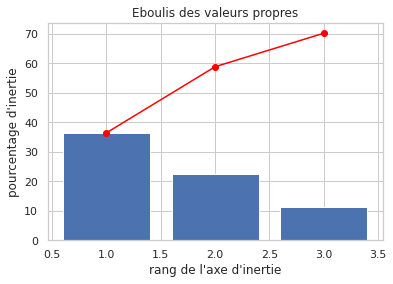

In [111]:
scree = pca.explained_variance_ratio_*100
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)


3 axes sont suffisant étant donné le ralentissement de la courbe de la somme des inerties.

### Cercles de corrélation

In [112]:
def plot_correlation_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):

    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

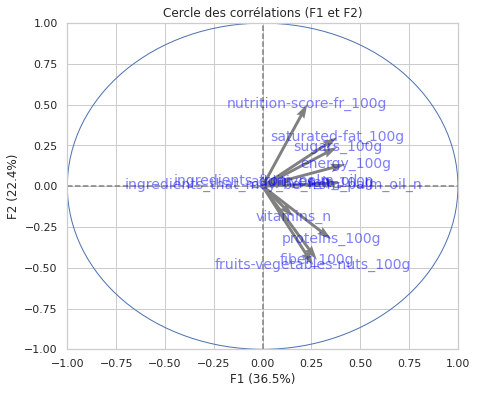

In [113]:
pcs = pca.components_

plot_correlation_circles(pcs, num_components, pca, [(0,1),(2,3)], labels = np.array(interesting_features_complete))


### Projections

In [114]:
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):

    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

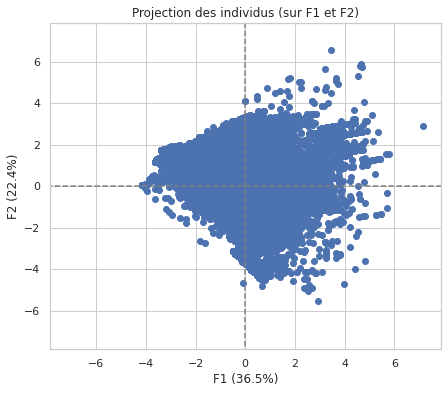

In [115]:
display_factorial_planes(projected_df.values, num_components, pca, [(0,1),(2,3)],)

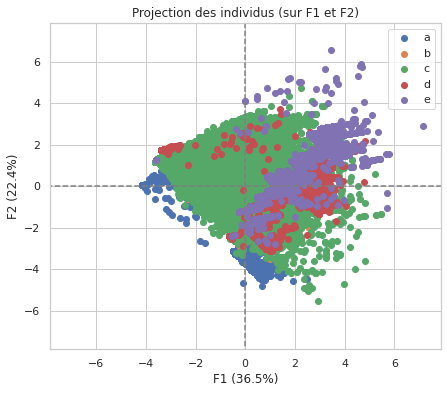

In [116]:
display_factorial_planes(projected_df.values, num_components, 
                         pca, [(0,1),(2,3)], illustrative_var=[df_copy['nutrition_grade_fr']])

L'axe F1 représente 

# Traitement des données pour l'application Voilà

## Eco-score

Nous allons calculer l'éco-score, un score que nous inventons et qui nous permettra de donner une information supplémentaire à l'utilisateur sur l'impact écologique du produit. Ce score ne se veut pas exhaustif puisque qu'il sera seulement basé sur une pondération des variables suivantes : `ingredients_from_palm_oil_n` et `ingredients_that_may_be_from_palm_oil_n`

In [117]:
df_copy['eco_score_num'] = 8*df_copy['ingredients_from_palm_oil_n'] + 2*df_copy['ingredients_that_may_be_from_palm_oil_n']

In [118]:
df_copy["eco_score_num"].unique()

<IntegerArray>
[0, 6, 2, 8, 10, 4, 12, 16, 14, 18, 20, 24]
Length: 12, dtype: Int64

## Global-score

L'idée est de créer un score global qui reprends toutes les informations de notre dataset. En effet, le nutriscore ne comporte pas d'informations sur les vitamines apportés par le produit ou encore la présence d'additif.

Le G-score sera influencé positivement par :


*   Le nombre de vitamines
*   Le nutriscore s'il est égal à A ou B

Le G-score sera influencé négativement par :


*   l'éco-score
*   le nombre d'additifs
*   le nutriscore s'il est égal à C, D ou E


In [119]:
df_copy.loc[df_copy['nutrition_grade_fr'] == 'a','g_score_num'] = 45
df_copy.loc[df_copy['nutrition_grade_fr'] == 'b','g_score_num'] = 15
df_copy.loc[df_copy['nutrition_grade_fr'] == 'c','g_score_num'] = -15
df_copy.loc[df_copy['nutrition_grade_fr'] == 'd','g_score_num'] = -45
df_copy.loc[df_copy['nutrition_grade_fr'] == 'e','g_score_num'] = -75

In [120]:
df_copy['vitamins_n'].unique()

array([ 0,  2,  1,  5,  4,  8,  3, 10,  9,  6,  7, 11, 12, 13])

In [121]:
df_copy['g_score_num'] = df_copy['g_score_num'] + df_copy['vitamins_n'] * 2 

In [122]:
df_copy['eco_score_num'].unique()

<IntegerArray>
[0, 6, 2, 8, 10, 4, 12, 16, 14, 18, 20, 24]
Length: 12, dtype: Int64

In [123]:
df_copy['g_score_num'] = df_copy['g_score_num'] - 2 * df_copy['eco_score_num']

In [124]:
df_copy['additives_n'].unique()

<IntegerArray>
[ 0,  2,  1,  3,  6,  5,  8,  4, 10, 11,  9,  7, 13, 12, 18, 22, 19, 17, 25,
 21, 14, 16, 20, 24, 23, 15, 26, 28, 27, 29, 31]
Length: 31, dtype: Int64

In [125]:
df_copy['g_score_num'] = df_copy['g_score_num'] - df_copy['additives_n']

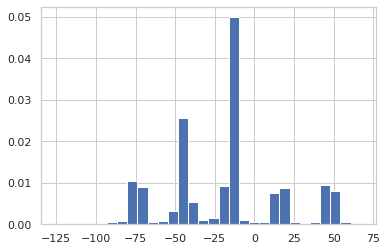

In [126]:
df_copy['g_score_num'].hist(density=True,bins=30)
plt.show()

In [127]:
min_gscore = df_copy['g_score_num'].min()
df_copy['g_score_num'] = df_copy['g_score_num'] + abs(min_gscore)

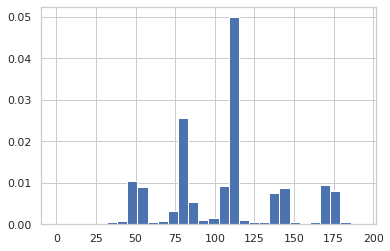

In [128]:
df_copy['g_score_num'].hist(density=True,bins=30)
plt.show()

In [129]:
df_copy.loc[df_copy['g_score_num'] < 63,'g_score_grade'] = 'e'
df_copy.loc[(df_copy['g_score_num'] >= 63) & (df_copy['g_score_num'] < 88),'g_score_grade'] = 'd'
df_copy.loc[(df_copy['g_score_num'] >= 88) & (df_copy['g_score_num'] < 125),'g_score_grade'] = 'c'
df_copy.loc[(df_copy['g_score_num'] >= 125) & (df_copy['g_score_num'] < 160),'g_score_grade'] = 'b'
df_copy.loc[df_copy['g_score_num'] >=160,'g_score_grade'] = 'a'

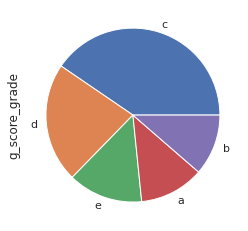

In [130]:
df_copy["g_score_grade"].value_counts(normalize=True).plot(kind='pie')

# Export des données

In [131]:
df_copy.to_csv("/content/data_cleaned.csv", sep=";", index=False)